# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Simulate-data-and-fit-2GP" data-toc-modified-id="Simulate-data-and-fit-2GP-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simulate data and fit 2GP</a></div><div class="lev1 toc-item"><a href="#Simulating-$t$-statistic-under-null" data-toc-modified-id="Simulating-$t$-statistic-under-null-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simulating <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-671-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>t</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5153" role="math" style="width: 0.386em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.322em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.7em 1000.32em 2.438em -999.998em); top: -2.338em; left: 0.002em;"><span class="mrow" id="MathJax-Span-5154"><span class="mi" id="MathJax-Span-5155" style="font-family: STIXMathJax_Main-italic;">t<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.034em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.341em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.037em; border-left: 0px solid; width: 0px; height: 0.733em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>t</mi></math></span></span><script type="math/tex" id="MathJax-Element-671">t</script> statistic under null</a></div><div class="lev1 toc-item"><a href="#Comparing-log-likelihoods" data-toc-modified-id="Comparing-log-likelihoods-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparing log-likelihoods</a></div><div class="lev2 toc-item"><a href="#With-mean-update" data-toc-modified-id="With-mean-update-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>With mean update</a></div><div class="lev2 toc-item"><a href="#checking-validity-of-test" data-toc-modified-id="checking-validity-of-test-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>checking validity of test</a></div><div class="lev2 toc-item"><a href="#Checking-the-validity-of-the-placebo-test" data-toc-modified-id="Checking-the-validity-of-the-placebo-test-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Checking the validity of the placebo test</a></div>

$$
    \newcommand{\genericdel}[3]{%
      \left#1#3\right#2
    }
    \newcommand{\del}[1]{\genericdel(){#1}}
    \newcommand{\sbr}[1]{\genericdel[]{#1}}
    \newcommand{\cbr}[1]{\genericdel\{\}{#1}}
    \newcommand{\abs}[1]{\genericdel||{#1}}
    \DeclareMathOperator*{\argmin}{arg\,min}
    \DeclareMathOperator*{\argmax}{arg\,max}
    \DeclareMathOperator{\Pr}{\mathbb{p}}
    \DeclareMathOperator{\E}{\mathbb{E}}
    \DeclareMathOperator{\Ind}{\mathbb{I}}
    \DeclareMathOperator{\V}{\mathbb{V}}
    \DeclareMathOperator{\cov}{Cov}
    \DeclareMathOperator{\var}{Var}
    \DeclareMathOperator{\ones}{\mathbf{1}}
    \DeclareMathOperator{\invchi}{\mathrm{Inv-\chi}^2}
    \DeclareMathOperator*{\argmin}{arg\,min}
    \DeclareMathOperator*{\argmax}{arg\,max}
    \newcommand{\effect}{\mathrm{eff}}
    \newcommand{\xtilde}{\widetilde{X}}
    \DeclareMathOperator{\normal}{\mathcal{N}}
    \DeclareMathOperator{\unif}{Uniform}
    \newcommand{\boxleft}{\unicode{x25E7}}
    \newcommand{\boxright}{\unicode{x25E8}}
    \newcommand{\discont}{\unicode{x25EB}}
    \newcommand{\jleft}{\unicode{x21E5}}
    \newcommand{\jright}{\unicode{x21E4}}
    \DeclareMathOperator*{\gp}{\mathcal{GP}}
    \newcommand{\trans}{^{\intercal}}
    \newcommand{\scrS}{\mathscr{S}}
    \newcommand{\sigmaf}{\sigma_{\mathrm{GP}}}
    \newcommand{\sigman}{\sigma_{\epsilon}}
    \newcommand{\sigmatau}{\sigma_{\tau}}
    \newcommand{\sigmabeta}{\sigma_{\beta}}
    \newcommand{\sigmamu}{\sigma_{\mu}}
    \newcommand{\sigmagamma}{\sigma_{\gamma}}
    \newcommand{\svec}{\mathbf{s}}
    \newcommand{\indep}{\perp}
    \newcommand{\iid}{iid}
    \newcommand{\vectreat}{\Ind_{T}}
    \newcommand{\yt}{Y^\mathrm{T}}
    \newcommand{\yc}{Y^\mathrm{C}}
    \newcommand{\boundary}{\partial}
    \newcommand{\sentinels}{\mathbf{\boundary}}
    \newcommand{\eye}{\mathbf{I}}
    \newcommand{\K}{\mathbf{K}}
    \DeclareMathOperator{\trace}{trace}
    \newcommand{\linavg}{\bar{\tau}}
    \newcommand{\invvar}{\tau^{IV}}
$$

Testing against a sharp null hypothesis seems like an obvious thing that people will want to do with spatial regression discontinuity designs. 
To be specific, the sharp null hypothesis would be that the treatment effect along the boundary is zero everywhere: $\tau(\boundary)=0$. 
I call it the sharp null to distinguish it from a hypothesis that the average treatment effect is zero.

So far I've been experimenting with various iterations of chi square tests, the simplest of which is to compute a $\chi^2$ statistic $\mu\trans\Sigma^{-1}\mu$ on the posterior treatment effect at the sentinels, and compare it to a $\chi^2$ distribution. 
But numerical instabilities make it difficult to work out how many degrees of freedom this distribution should have.
I've tried various alternatives and algorithms, which all make some kind of sense, but contradict each other, and suffer from numerical issues.

In this notebook, I implement two tests that rely on parametric bootstraps to derive a null distribution rather than obtaining a theoretical null distribution. 
The first uses the $\chi^2$ statistic above. To be explicit, here's the full procedure:

1. fit $\gp$s to the treatment and control regions
2. optimize their (shared) hyperparameters
2. obtain the “cliff face” posterior means and covariance $\mu$ and $\Sigma$ at the sentinels following our 2$\gp$ procedure
3. compute the observed $\chi^2$ statistic $\chi^2_\mathrm{obs}=\mu\trans\Sigma^{-1}\mu$
3. create a null $\gp$, which is a single $\gp$ covering both regions, with the same hyperparameters
4. simulate from this null $\gp$, and for each simulation
    * fit the two $\gp$s on the simulated data
    * obtain and save the $\chi^2$ statistic
5. compare the distribution of the simulated $\chi^2$ statistics to $\chi^2_\mathrm{obs}$
6. a p-value is obtained as the proportion of simulated values above the observed value

In this notebook, I apply this method to simulated data, with a fairly strong constant treatment effect, and the test unambiguously detects the treatment effect. Obtaining the $\chi^2$ statistic on 1000 random samples takes 4.5 seconds. None of the samples are above the observed value.

The second procedure I implement is the one suggested by LukeM, that uses the log-likelihood rather than the $\chi^2$ statistic at the boundary. 
This could be described as a parametric bootstrap version of a likelihood ratio test. 
Here's the procedure:

1. fit $\gp$s to the treatment and control regions
2. optimize their (shared) hyperparameters
3. obtain the log-likelihood (sum of the two log-likelihoods)
3. create a null $\gp$, which is a single $\gp$ covering both regions, with the same hyperparameters
4. obtain its log-likelihood
5. compute $\Delta\log P_\mathrm{obs}$, the difference between the $2\gp$ log-likelihood and the null model log-likelihood
4. simulate from the null $\gp$, and for each simulation
    * update the mean parameter of the null and alternative $\gp$s to their respective empirical values
    * fit the two $\gp$s on the simulated data
    * fit the null model to the simulated data
    * obtain the log-likelihoods for the null and alternative model
    * store their difference, $\Delta\log P_\mathrm{sim}$
5. compare the distribution of the simulated $\Delta\log P_\mathrm{sim}$ to $\Delta\log P_\mathrm{obs}$
6. a p-value is obtained as the proportion of simulated values above the observed value

Within each simulation, I'm not optimizing the hyperparameters, other than setting the mean to its empirical value. This is mostly for computational reasons, as I get to reuse the Cholesky decomposition. This means on my laptop I can do 10,000 simulations in just over 6 seconds.

# Simulate data and fit 2GP

This section is just setting up the simulation. The treatment effect is just a constant shift, and I'm simulating from a GP with known hyperparameters.

In [1]:
using LaTeXStrings
using GaussianProcesses
using Distributions
using Base.LinAlg
using Distances
import PyPlot; plt=PyPlot
plt.rc("figure", dpi=300.0)
# plt.rc("figure", figsize=(6,4))
plt.rc("figure", autolayout=true)
plt.rc("savefig", dpi=300.0)
plt.rc("text", usetex=true)
plt.rc("font", family="serif")
plt.rc("font", serif="Palatino")
;

In [2]:
module GeoRDD
    using GaussianProcesses
    using PDMats
    include("src/cliff_face.jl")
    include("src/point_estimates.jl")
    include("src/boot_mLLtest.jl")
end

GeoRDD

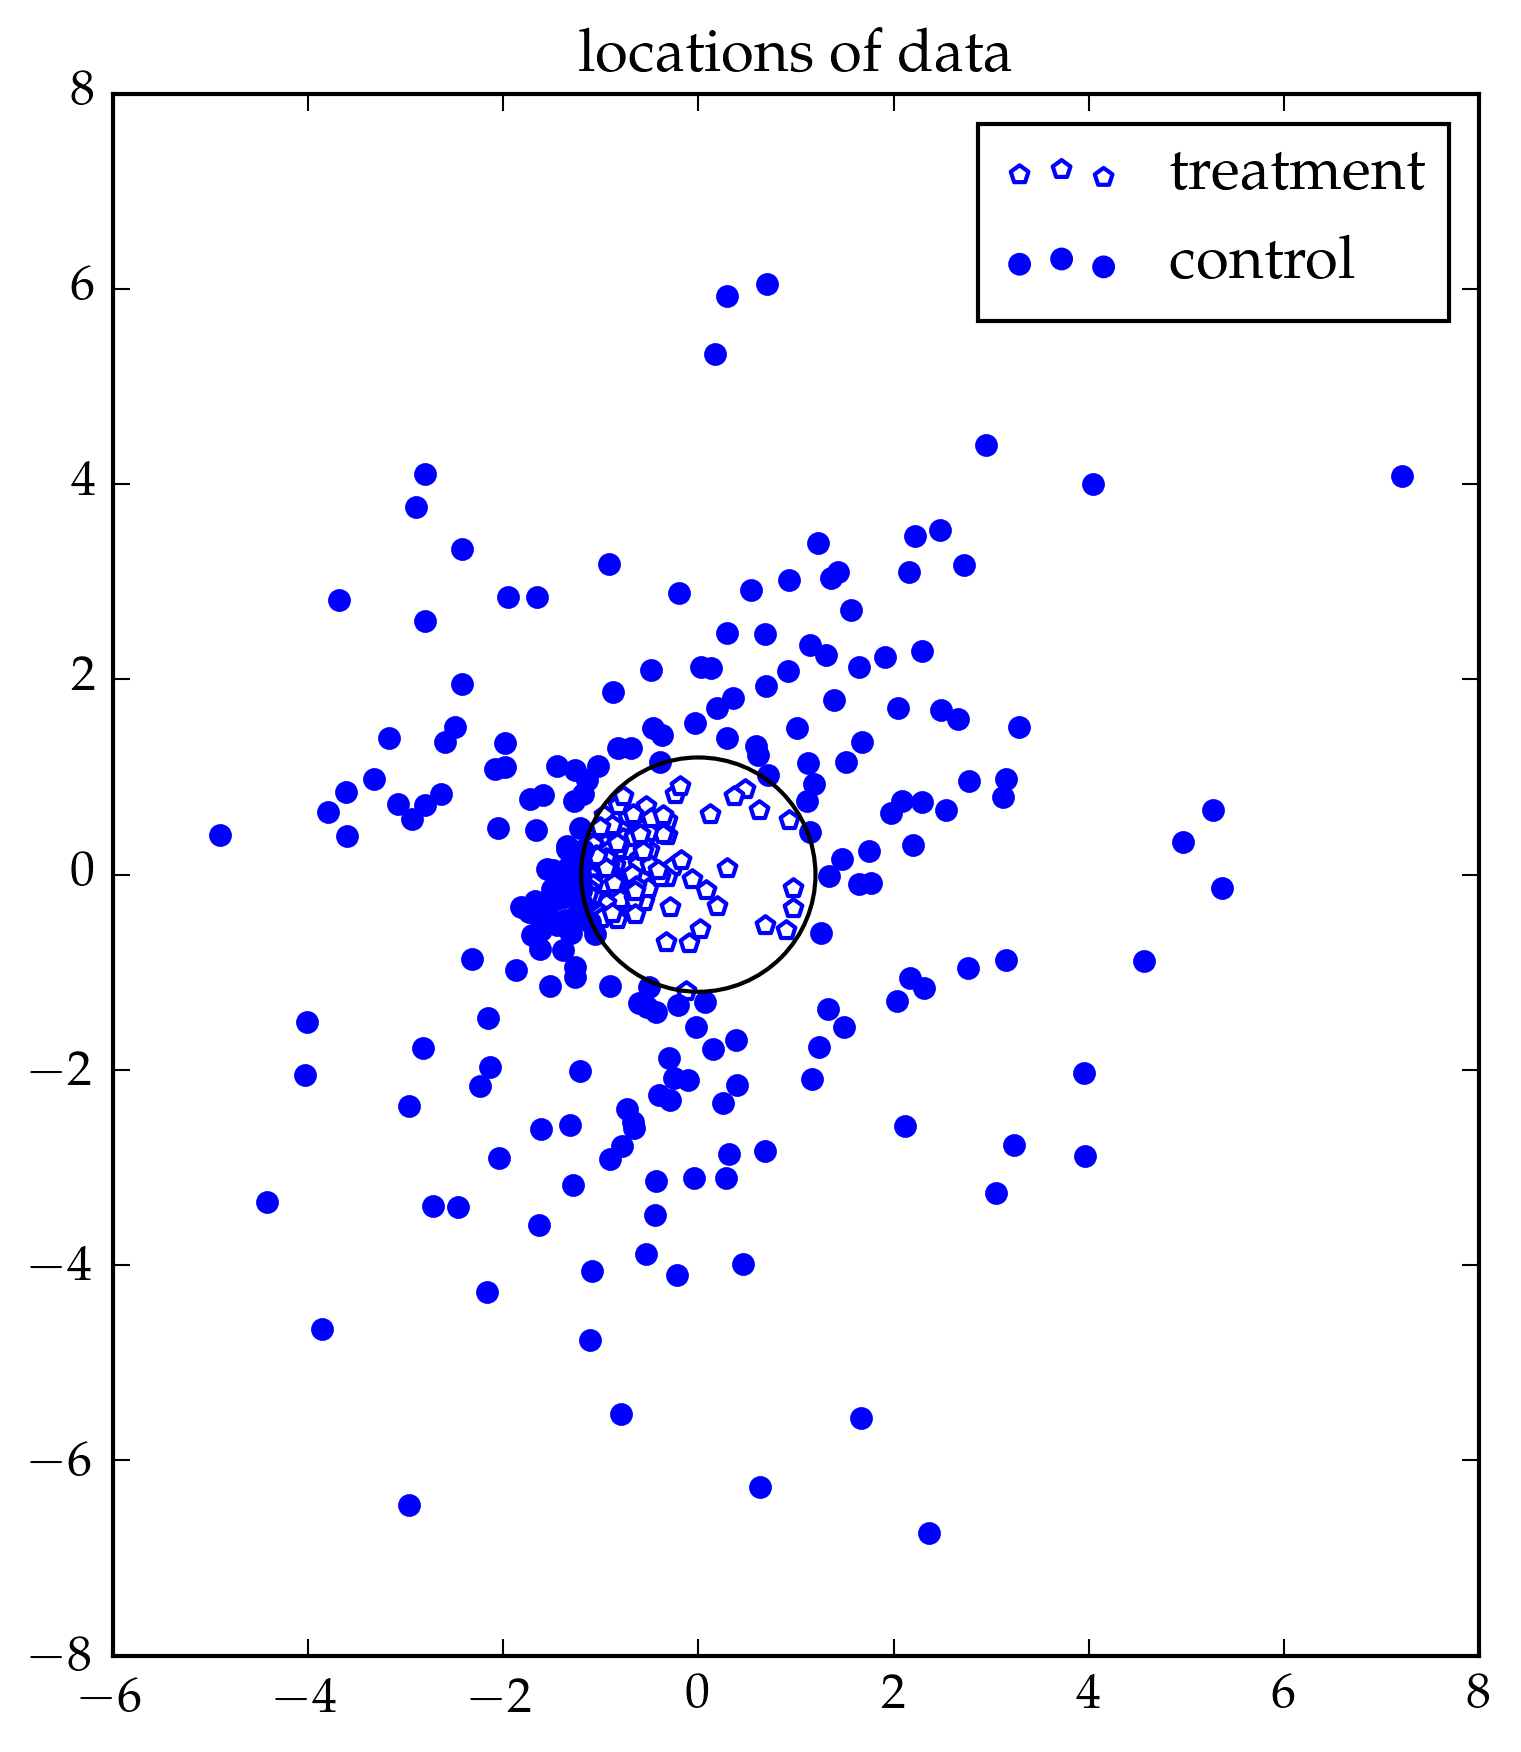

/Users/imolk/bin/venv_jupyter/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [3]:
city = MultivariateNormal([-1.0,0.0], [[0.1,0.05] [0.05, 0.1]])
village = MultivariateNormal([1.0,1.0], [[0.3,-0.1] [-0.1, 0.3]])
countryside = MultivariateNormal([0.0, 0.0], [[5.0,0.0] [0.0, 5.0]])
ncity = 180
nvillage = 10
ncountryside = 200
X=[rand(city, ncity) rand(village, nvillage) rand(countryside, ncountryside)]
_,n = size(X)
r◫ = 1.2
inside = vec((X[1,:].^2 .+ X[2,:].^2) .< r◫^2)
plt.scatter(X[1,inside],X[2,inside], color="white", edgecolor="blue", marker="p", label="treatment")
plt.scatter(X[1,!inside],X[2,!inside], color="blue", label="control")
circle=plt.plt[:Circle]((0,0),r◫,color="black", fill=false)
plt.gca()[:add_artist](circle)
plt.gca()[:set_aspect]("equal")
plt.title("locations of data")
plt.legend(loc="best")
;

In [4]:
Lstar=1.0
σf_star=2.0
σy2_star=0.5
τstar = 1.0 # strong treatment effect
kern = SE(log(Lstar), log(σf_star))
;

In [5]:
Σprior=cov(kern, X)
μprior=zeros(n)
Σobs=copy(Σprior)
for i in 1:n
    Σobs[i,i] += σy2_star
end
prior=MultivariateNormal(μprior,Σobs)
Y=rand(prior)
Y[inside] .+= τstar # treatment effect applied inside circle
;

In [6]:
n◫ = 120
α◫ = linspace(0,2π,n◫)
x1◫ = cos(α◫)*r◫
x2◫ = sin(α◫)*r◫
X◫ = [x1◫ x2◫]'
size(X◫)

(2,120)

In [7]:
gp_fit_inside = GP(X[:,inside], Y[inside], MeanZero(), kern, log(√σy2_star))
gp_fit_outside = GP(X[:,!inside], Y[!inside], MeanZero(), kern, log(√σy2_star))
;

In [8]:
μposterior, Σposterior = GeoRDD.cliff_face(gp_fit_outside, gp_fit_inside, X◫)
;

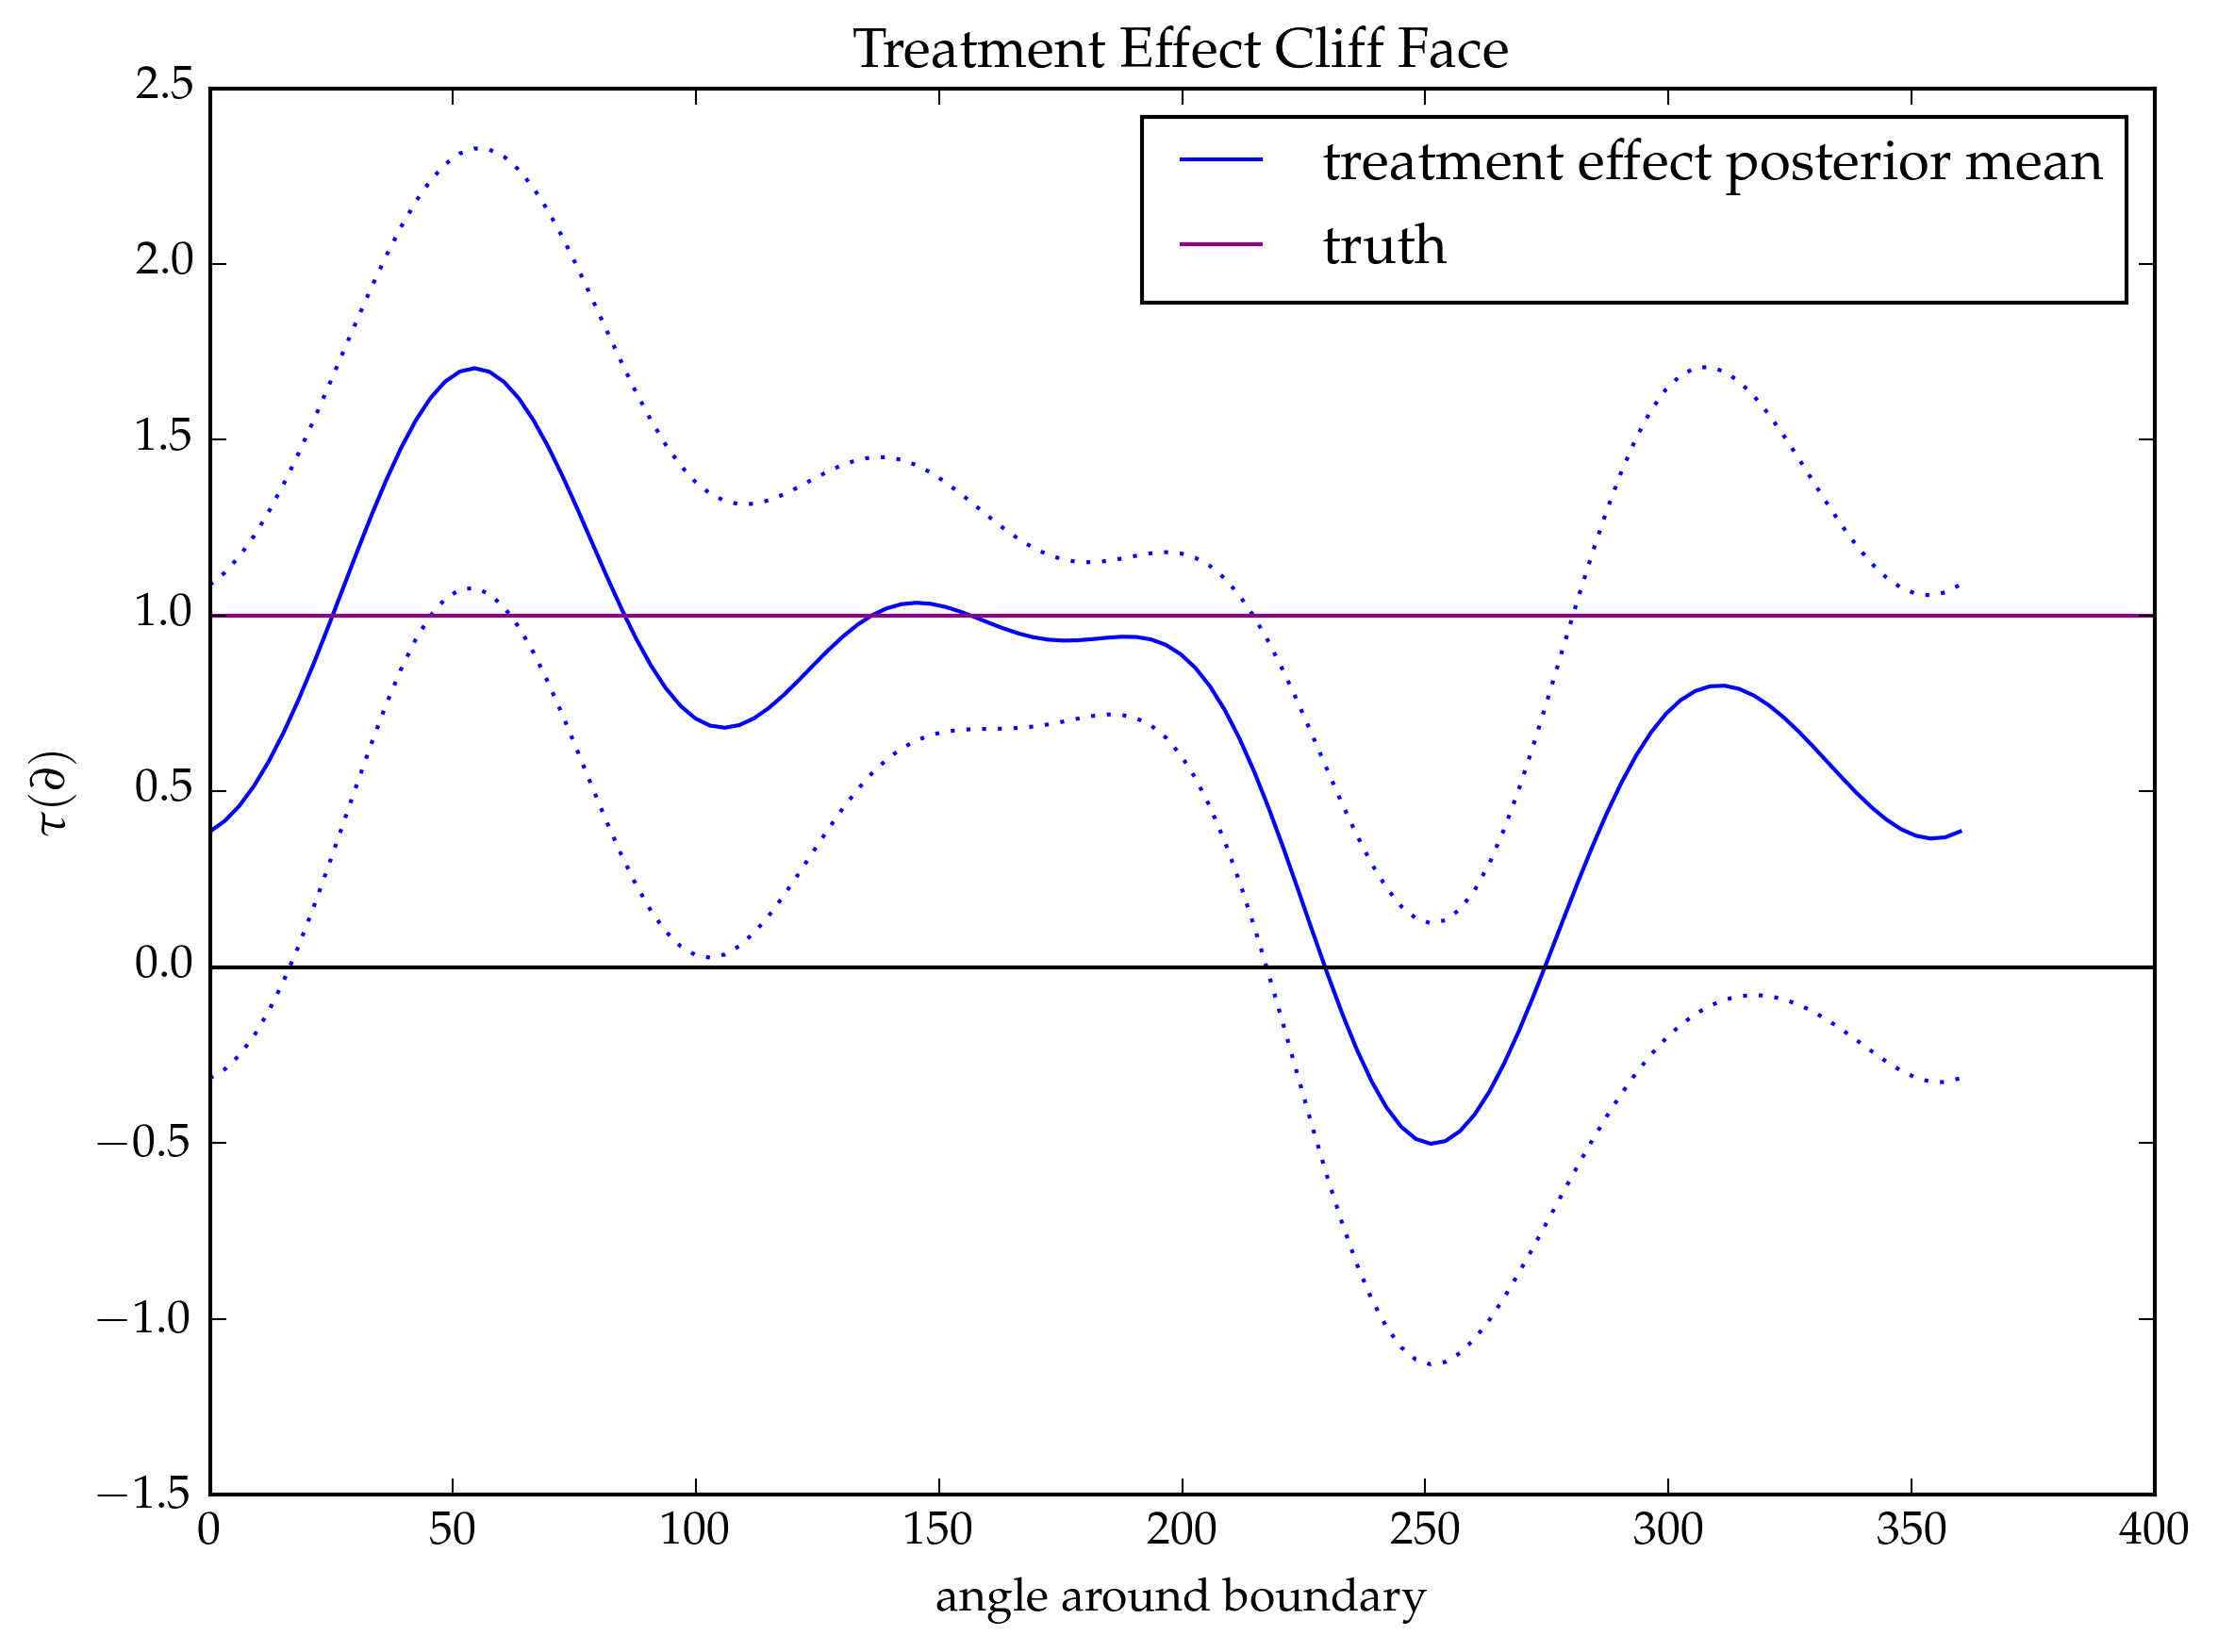

In [9]:
PyPlot.plt[:interactive](true)
plt.title("Treatment Effect Cliff Face")
PyPlot.plt[:interactive](false)
plt.plot(α◫*360/2π, μposterior, color="blue", label="treatment effect posterior mean")
plt.plot(α◫*360/2π, μposterior.+√diag(Σposterior), color="blue", linestyle=":")
plt.plot(α◫*360/2π, μposterior.-√diag(Σposterior), color="blue", linestyle=":")
plt.axhline(y=0, color="black")
plt.axhline(y=τstar, color="darkmagenta", label="truth")
plt.ylabel(L"\tau(\partial)")
plt.xlabel("angle around boundary")
plt.legend()
PyPlot.plt[:interactive](true)
;

# Simulating $t$ statistic under null

In [10]:
chi_obsv = GeoRDD.chistat(gp_fit_inside, gp_fit_outside, X◫)

33.740327487234026

In [11]:
@time chi_sims = GeoRDD.nsim_chi(gp_fit_inside, gp_fit_outside, X◫, 1000);

  4.667198 seconds (591.14 k allocations: 2.180 GB, 3.37% gc time)


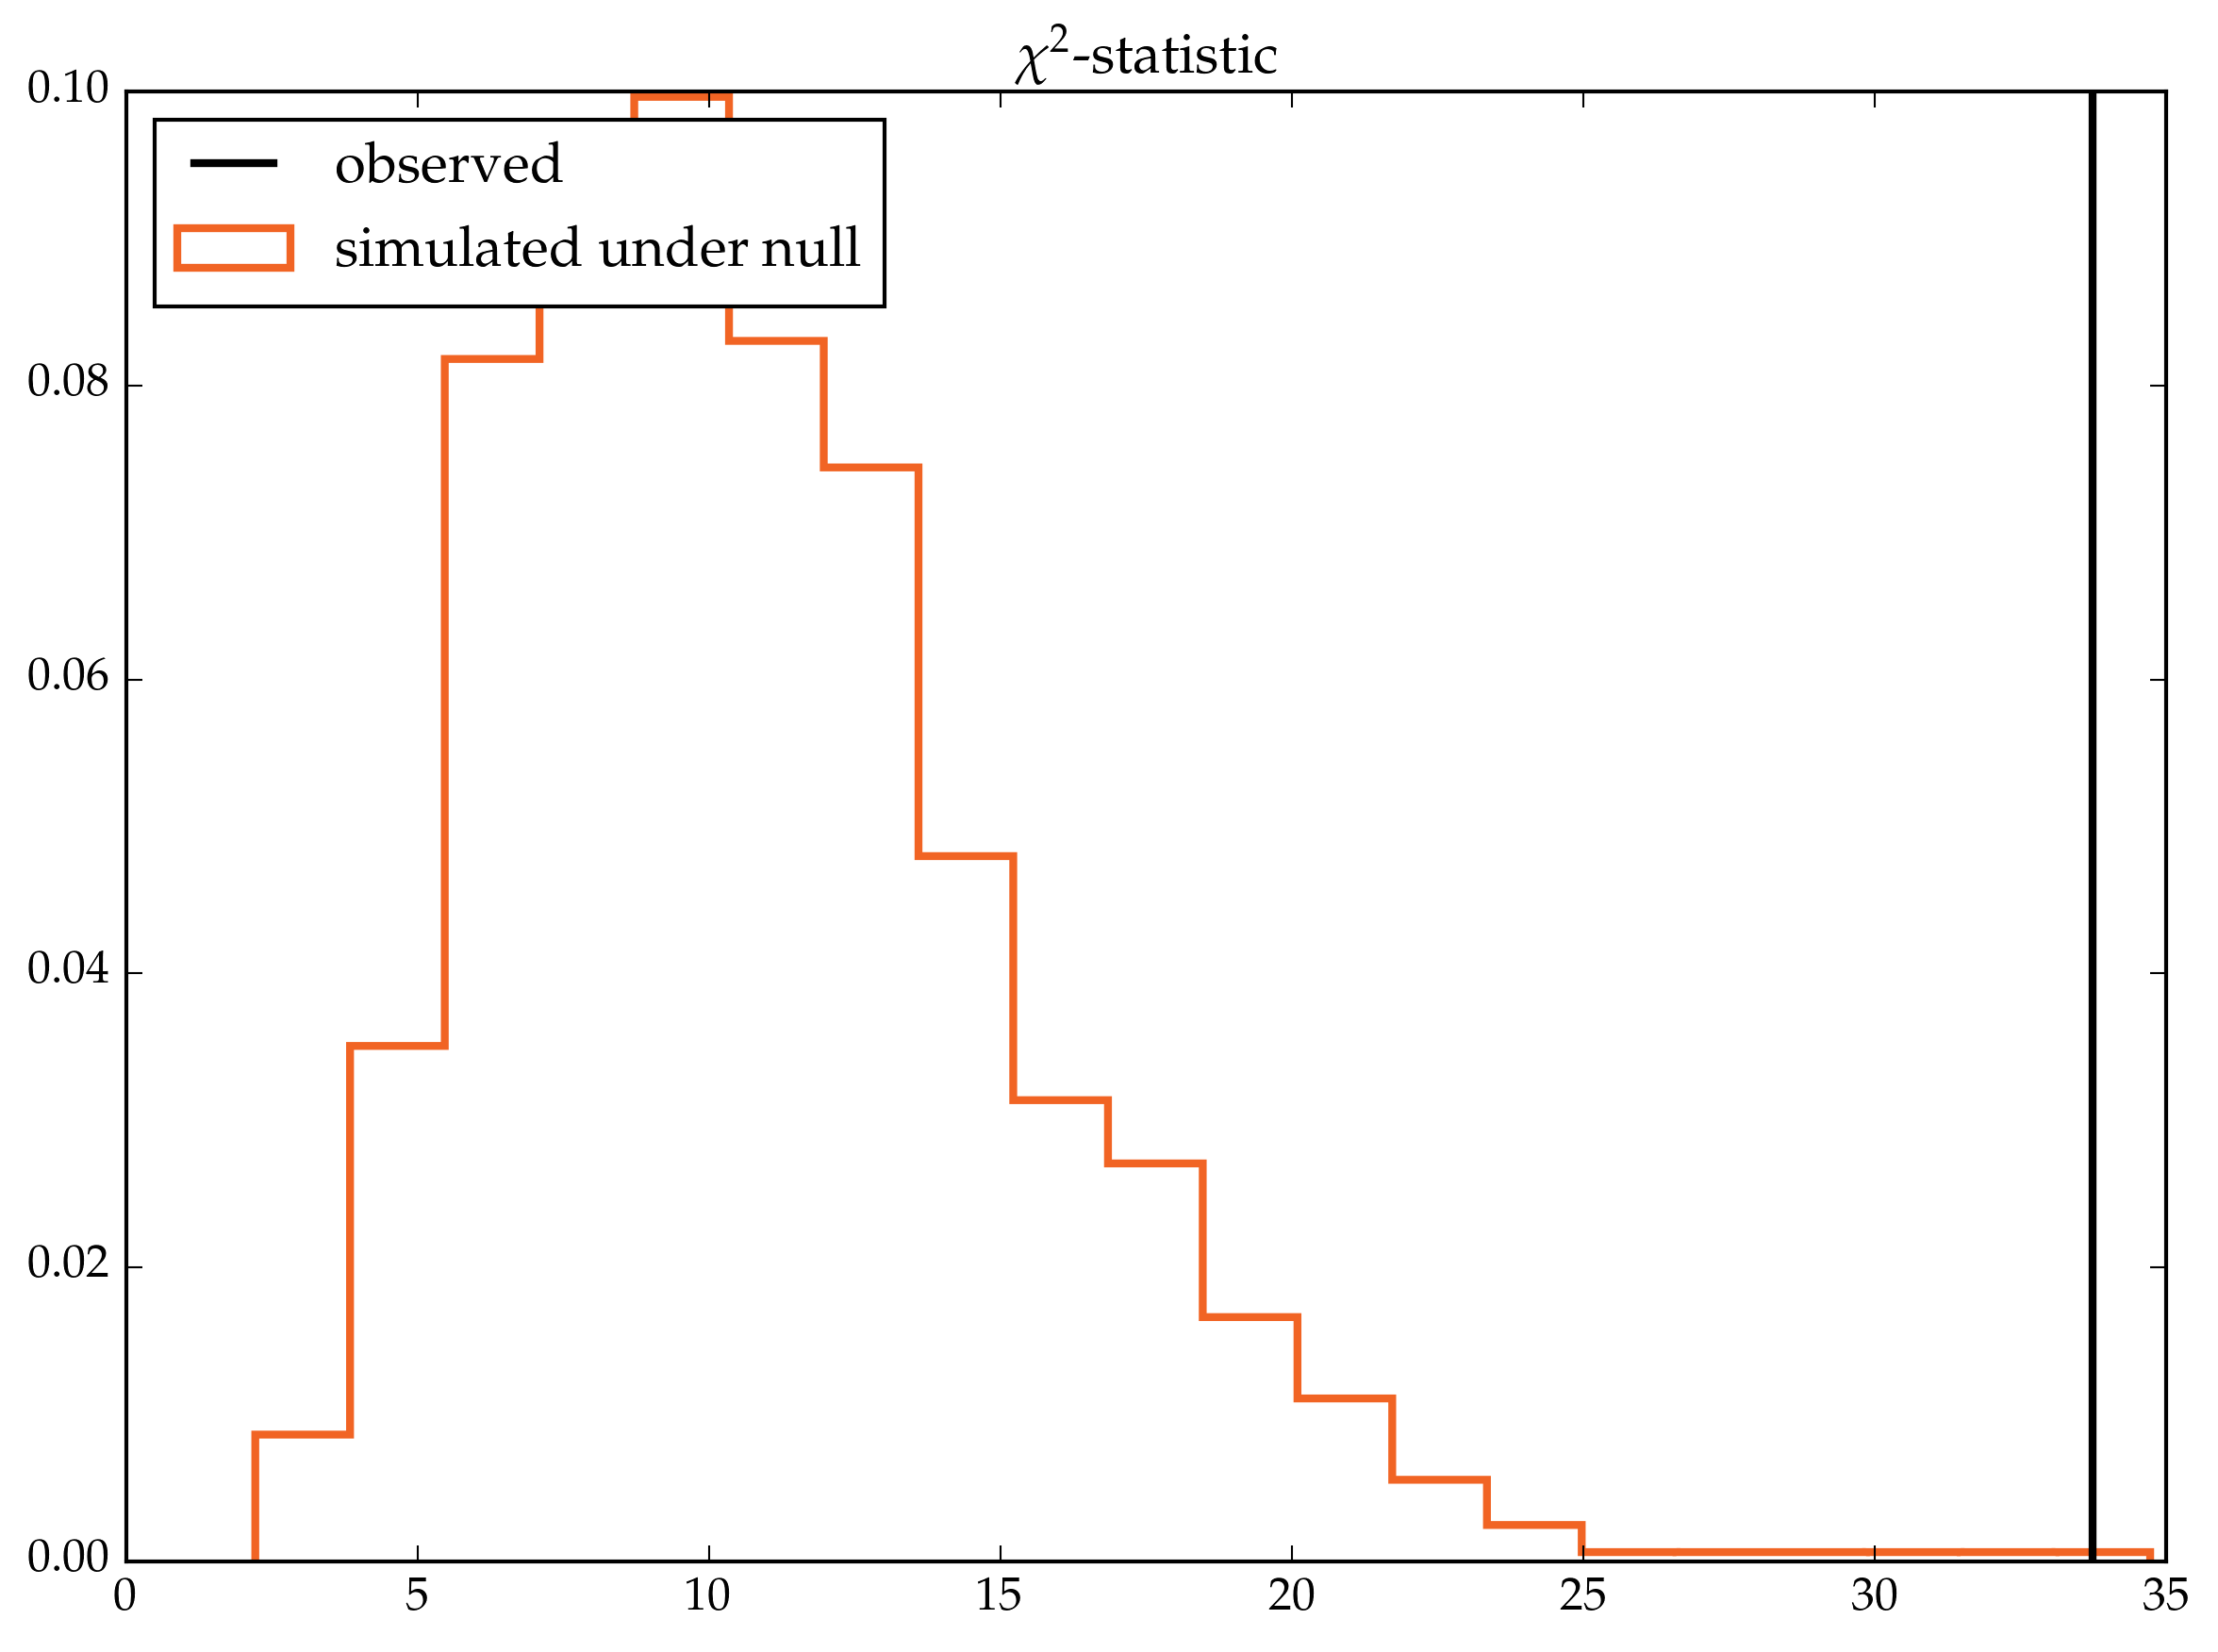

In [12]:
plt.plt[:hist](chi_sims, normed=true, bins=20, color="#F16424", histtype="step", linewidth=2, label="simulated under null")
plt.axvline(chi_obsv, color="black", label="observed", linewidth=2)
plt.legend(loc="best")
plt.title(L"$\chi^2$-statistic")
;

In [13]:
mean(chi_sims .> chi_obsv)

0.001

# Comparing log-likelihoods

Now we come to the likelihood-based test. This one's interesting because it doesn't directly use the information available at the boundary. In fact, the sentinel positions are not used in this test at all, just the treatment-control indicators.

In [14]:
gp_null = GP(X, Y, MeanZero(), kern, log(√σy2_star))
mLL_altv = gp_fit_inside.mLL + gp_fit_outside.mLL
mLL_null = gp_null.mLL
@printf("log-likelihood of observed under null:        %.3f\n", mLL_null)
@printf("log-likelihood of observed under alternative: %.3f", mLL_altv)

log-likelihood of observed under null:        -504.538
log-likelihood of observed under alternative: -497.139

In [34]:
# obtain log-likelihoods for the null and alternative models
# of simulations under the null
@time mLL_sims = GeoRDD.nsim_logP(gp_fit_inside, gp_fit_outside, 10000; update_mean=false);

  5.789000 seconds (735.84 k allocations: 427.351 MB, 0.65% gc time)


In [35]:
# extract the null and alternative likelihoods
mLL_sim_null = [sim[1] for sim in mLL_sims]
mLL_sim_altv = [sim[2] for sim in mLL_sims]
;

I now plot histograms of the simulated log-likelihoods. 
Because we're simulating from the null, it makes sense that the null-likelihood is on average higher
(the blue histogram is slightly to the right of the orange histogram),
and because the observed data includes a constant treatment effect,
it also makes sense that the likelihood of the null model
for the observed data is slightly *lower* than the null log-likelihood.
That's the fundemental idea with this test: by comparing
the differences in log-likelihoods between the null
and alternative hypotheses, we should be able to construct
a valid test.

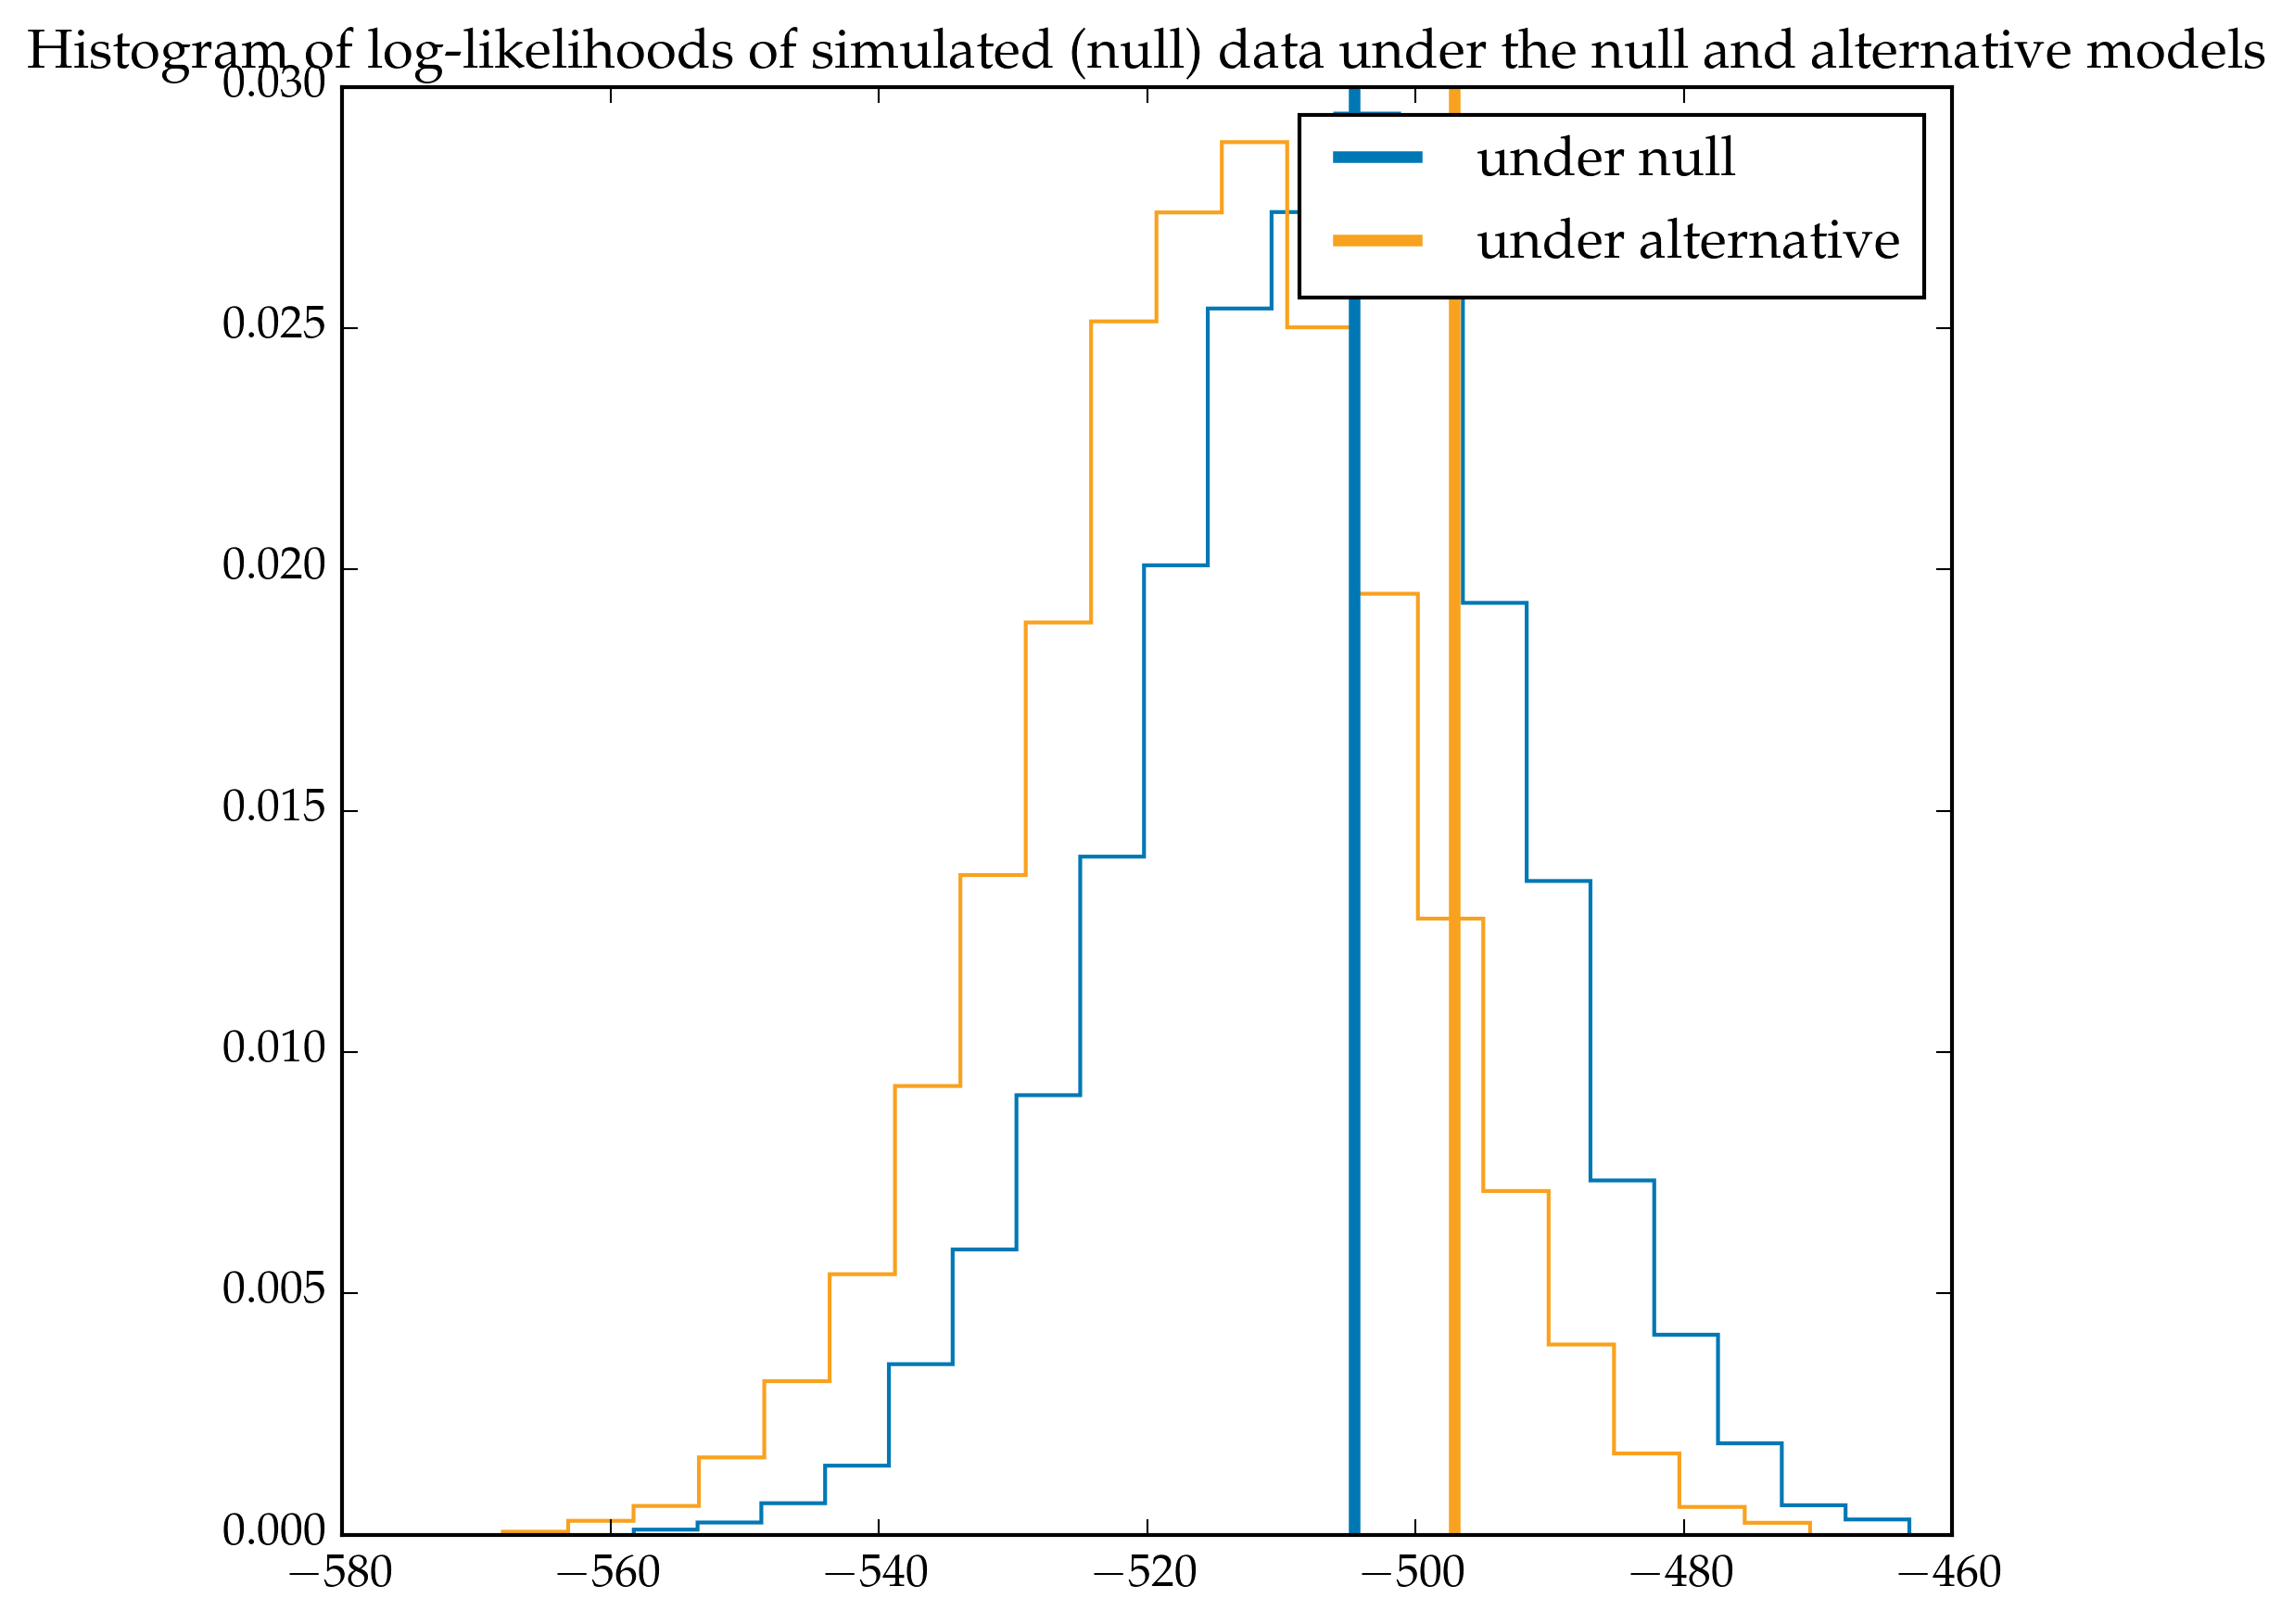

In [17]:
plt.plt[:hist](mLL_sim_null, normed=true, bins=20, color="#0078B5", histtype="step", linewidth=1)
plt.plt[:hist](mLL_sim_altv, normed=true, bins=20, color="#F8A21F", histtype="step", linewidth=1)
plt.axvline(mLL_null, color="#0078B5", label="under null", linewidth=3)
plt.axvline(mLL_altv, color="#F8A21F", label="under alternative", linewidth=3)
plt.legend()
plt.title("Histogram of log-likelihoods of simulated (null) data under the null and alternative models")
;

To complete the test, we focus on the difference in log-likelihoods. Again I plot a histogram of the simulated and observed values.

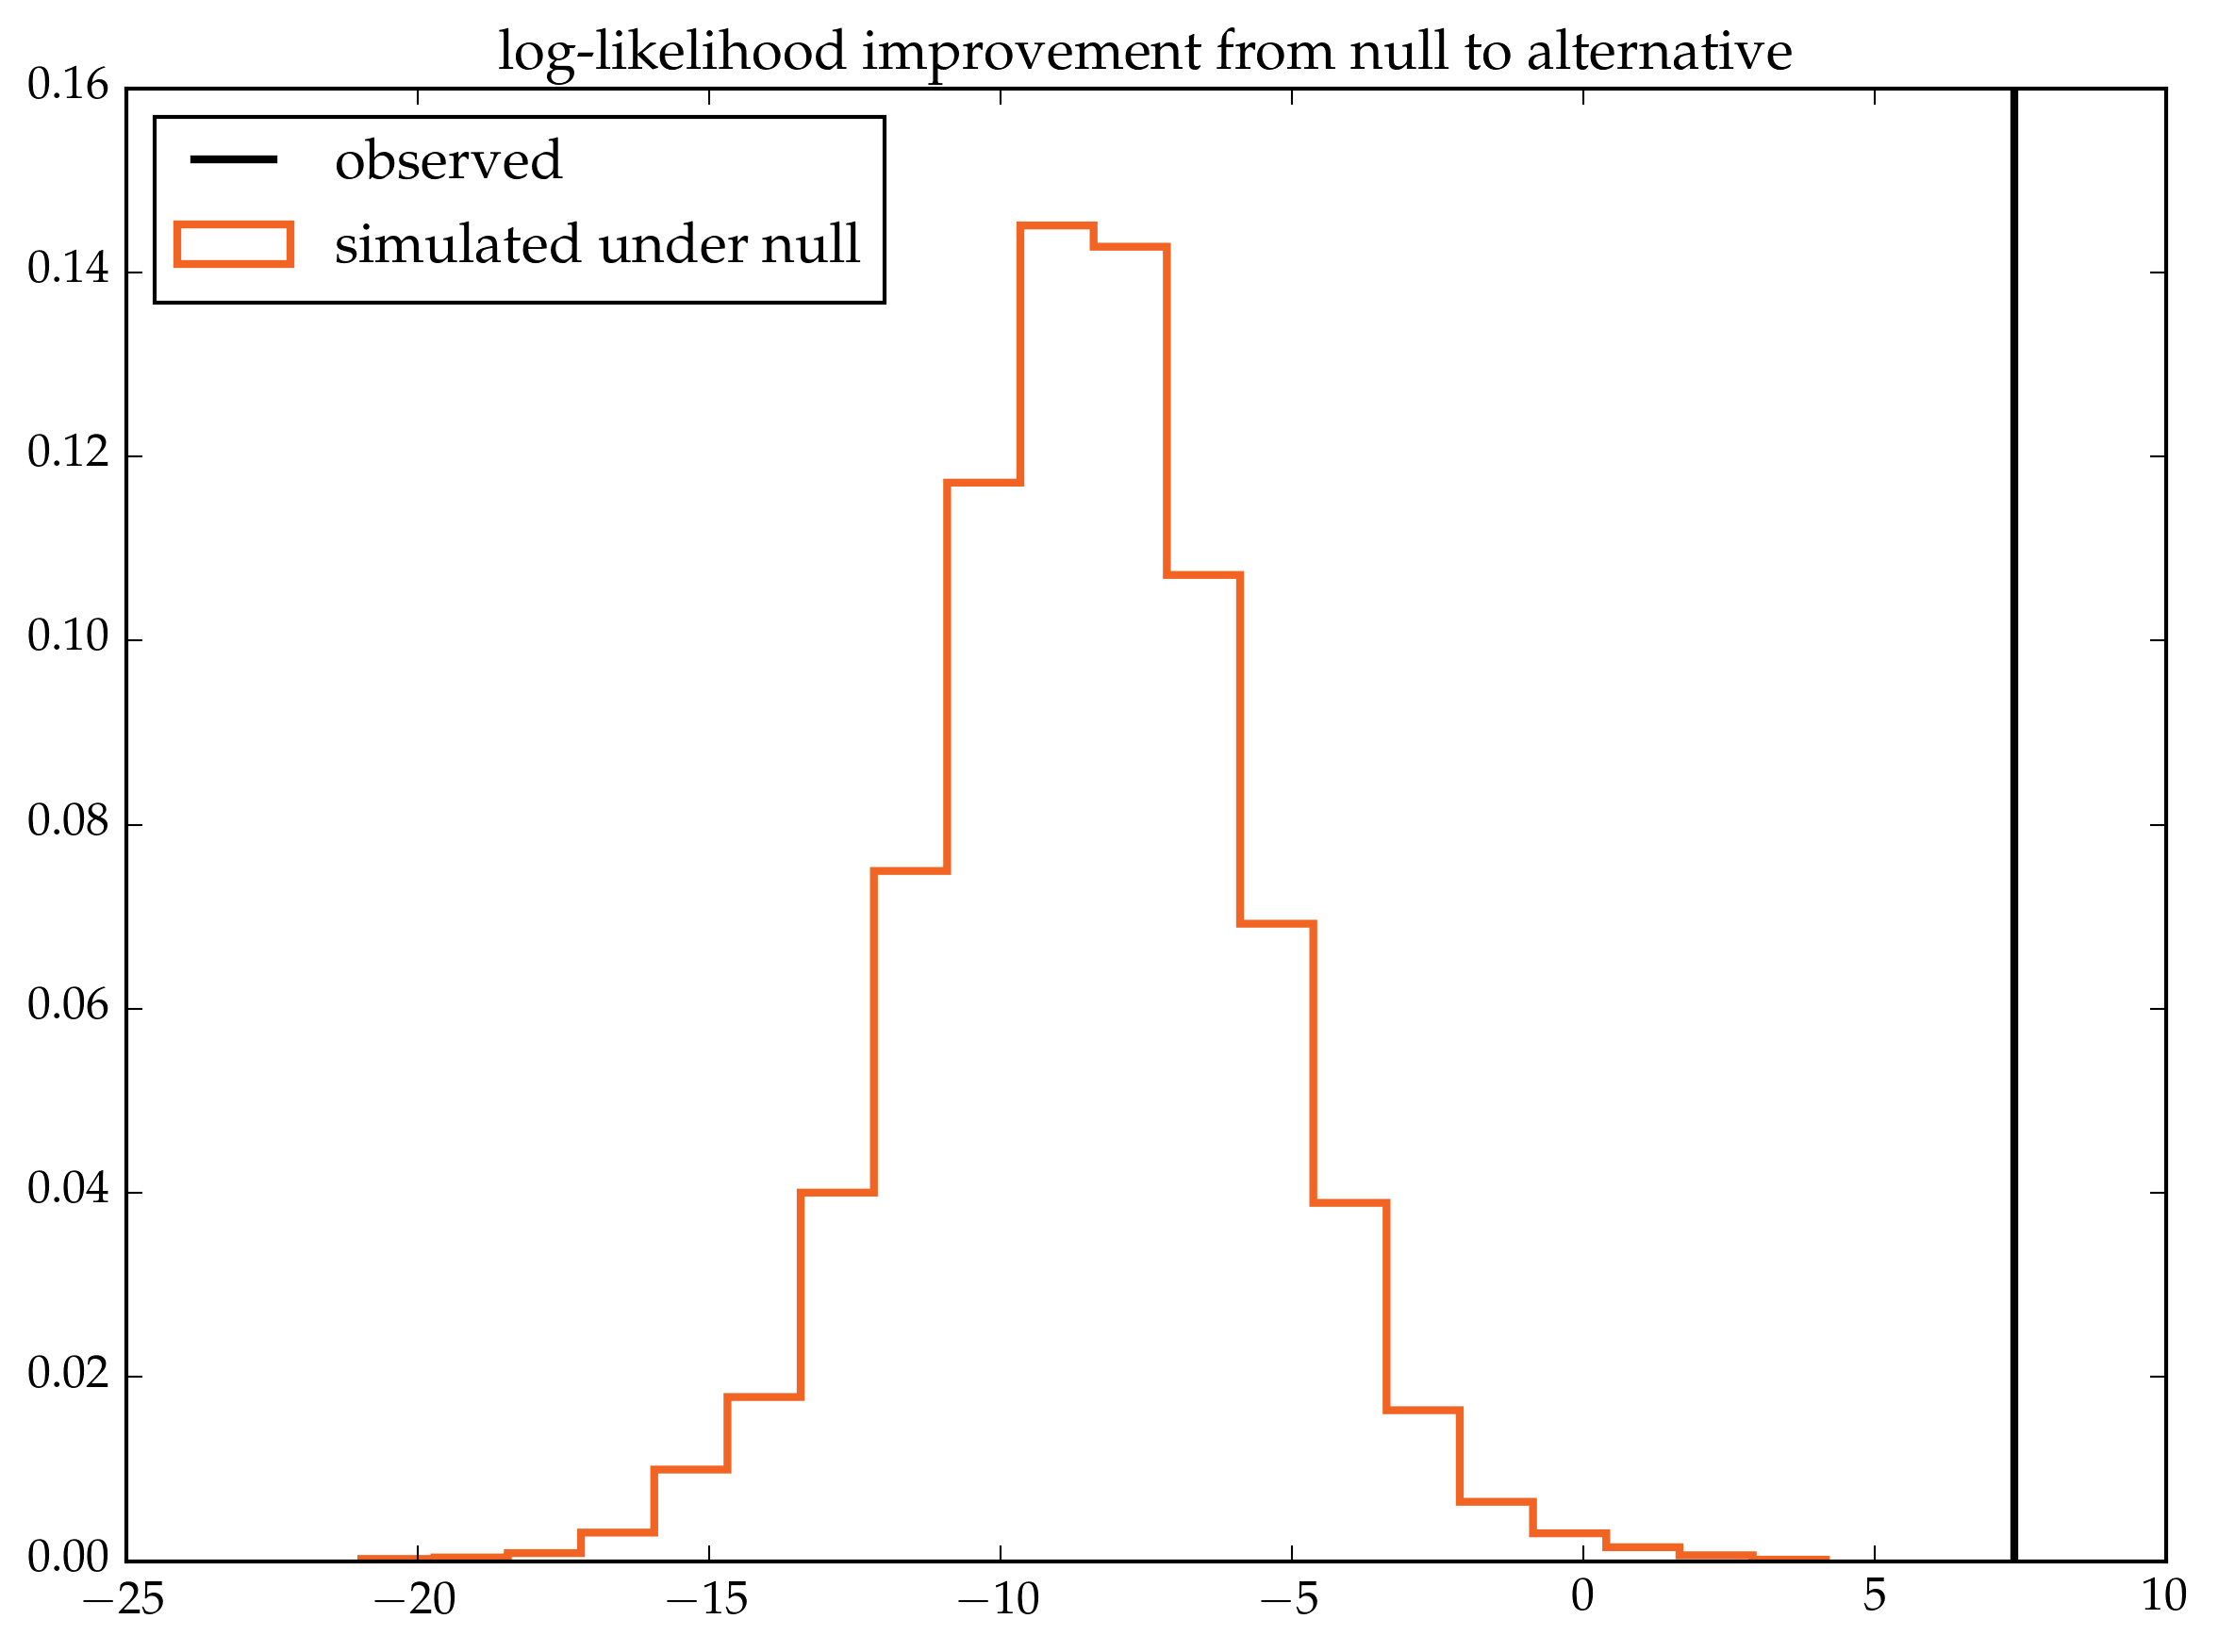

In [18]:
plt.plt[:hist](mLL_sim_altv.-mLL_sim_null, normed=true, bins=20, color="#F16424", histtype="step", linewidth=2, label="simulated under null")
plt.axvline(mLL_altv-mLL_null, color="black", label="observed", linewidth=2)
plt.legend(loc="best")
plt.title("log-likelihood improvement from null to alternative")
;

It's pretty obvious from the histogram that the p-value is zero.
We can also obtain the p-value as the frequency of simulations
that have a log-likelihood difference $\Delta\log P_\mathrm{sim}$ 
above the observed $\Delta\log P_\mathrm{obs}$.

In [36]:
pval_nomean = mean((mLL_sim_altv.-mLL_sim_null) .> (mLL_altv-mLL_null)) # p-value

0.0

## With mean update

This section is just a slight modification of the procedure, allowing for mean updates within
each simulation. Everything else is the same.

In [20]:
@time mLL_sims = GeoRDD.nsim_logP(gp_fit_inside, gp_fit_outside, 10000; update_mean=true);

  6.159559 seconds (765.88 k allocations: 427.810 MB, 2.68% gc time)


In [21]:
mLL_sim_null = [sim[1] for sim in mLL_sims]
mLL_sim_altv = [sim[2] for sim in mLL_sims]
;

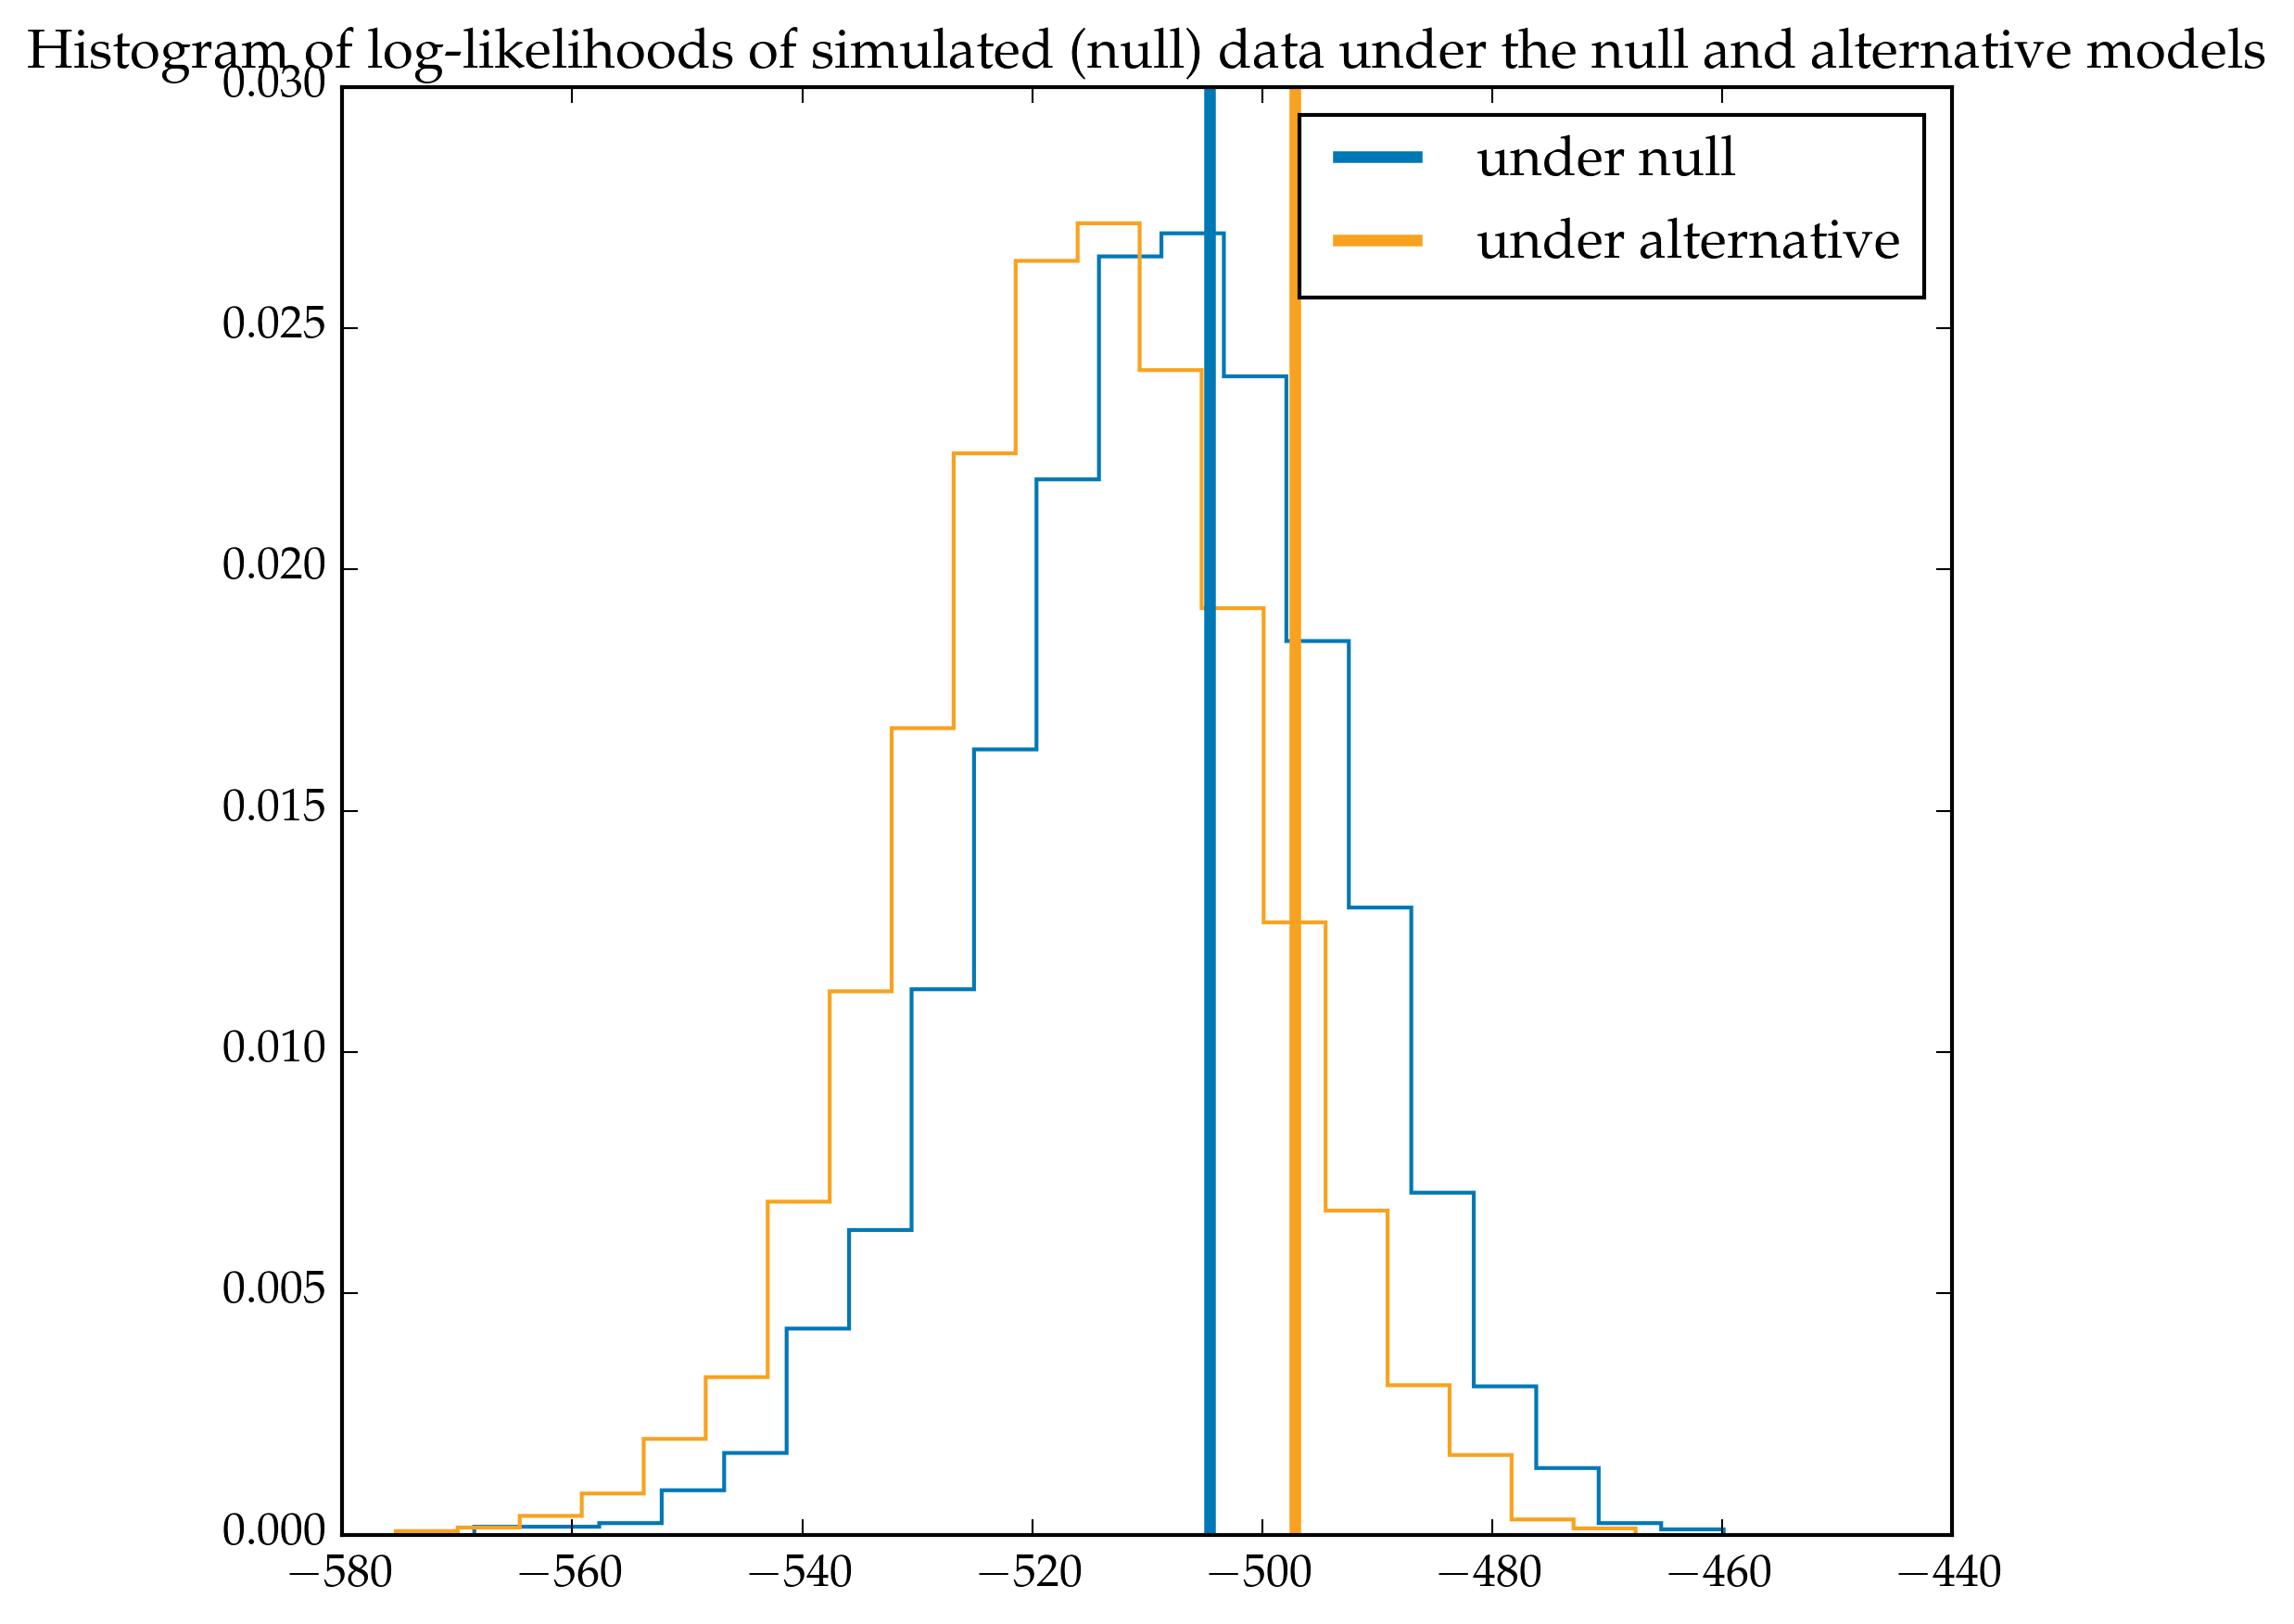

In [22]:
plt.plt[:hist](mLL_sim_null, normed=true, bins=20, color="#0078B5", histtype="step", linewidth=1)
plt.plt[:hist](mLL_sim_altv, normed=true, bins=20, color="#F8A21F", histtype="step", linewidth=1)
plt.axvline(mLL_null, color="#0078B5", label="under null", linewidth=3)
plt.axvline(mLL_altv, color="#F8A21F", label="under alternative", linewidth=3)
plt.legend()
plt.title("Histogram of log-likelihoods of simulated (null) data under the null and alternative models")
;

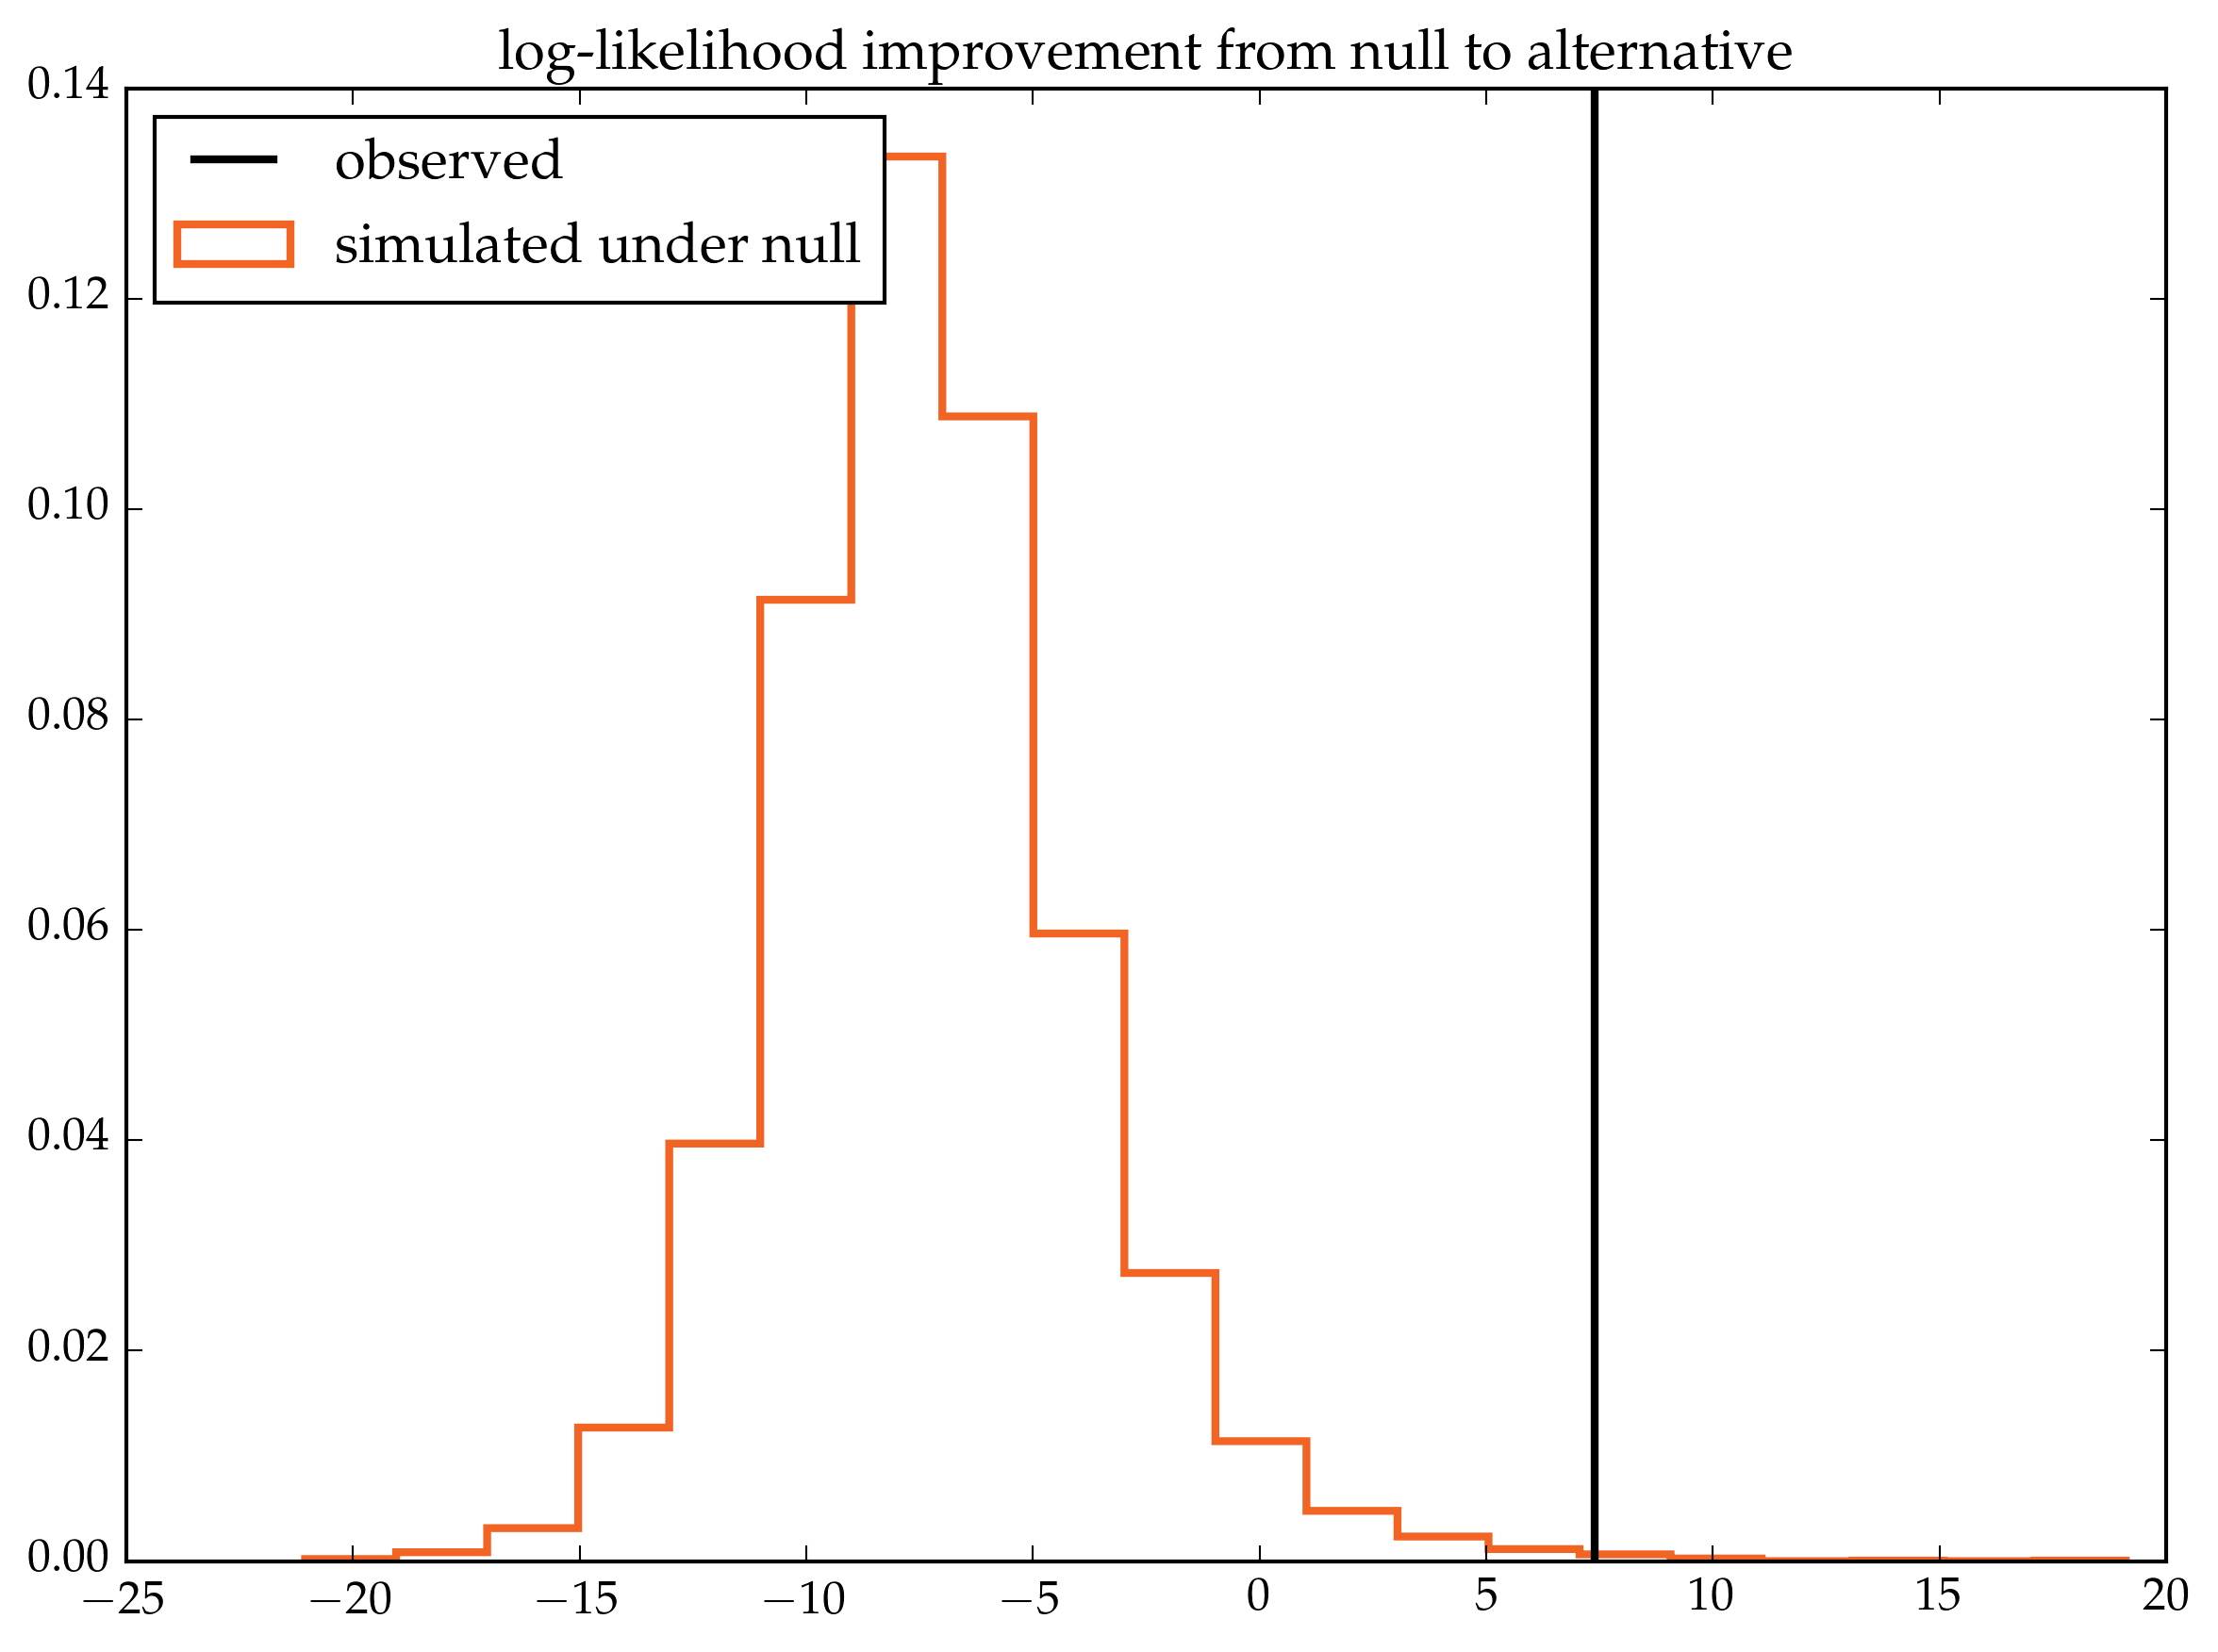

In [23]:
plt.plt[:hist](mLL_sim_altv.-mLL_sim_null, normed=true, bins=20, color="#F16424", histtype="step", linewidth=2, label="simulated under null")
plt.axvline(mLL_altv-mLL_null, color="black", label="observed", linewidth=2)
plt.legend(loc="best")
plt.title("log-likelihood improvement from null to alternative")
;

In [31]:
p_val_meanup = mean((mLL_sim_altv.-mLL_sim_null) .> (mLL_altv-mLL_null)) # p-value

0.0018

This gives the null model a slight edge in the simulations (because it has two mean parameters),
and so the p-value goes up from {{pval_nomean}} to {{p_val_meanup}}.
Still a very clear rejection of the null hypothesis.

## checking validity of test

Now, the validity of the test isn't immediately obvious,
so I decided to implement a kind of placebo test. 
The idea is to take just the control data (or just the treatment data),
and draw an arbitrary boundary through it, and then
run the likelihood test to obtain a p-value.
If we repeat this procedure over many different arbitrary boundaries,
we'd hope to get some kind of uniformly distributed
p-value. 
The way I implemented it is that I iterated over angles from 1° to 180°, 
drew a line through the data, and shifted it until there was 50% of
the data on either side of the boundary. The picture below is an example
of this procedure, with the black circle showing the real discontinuity,
and the red line showing the placebo boundary, at an angle of 130° from
horizontal.

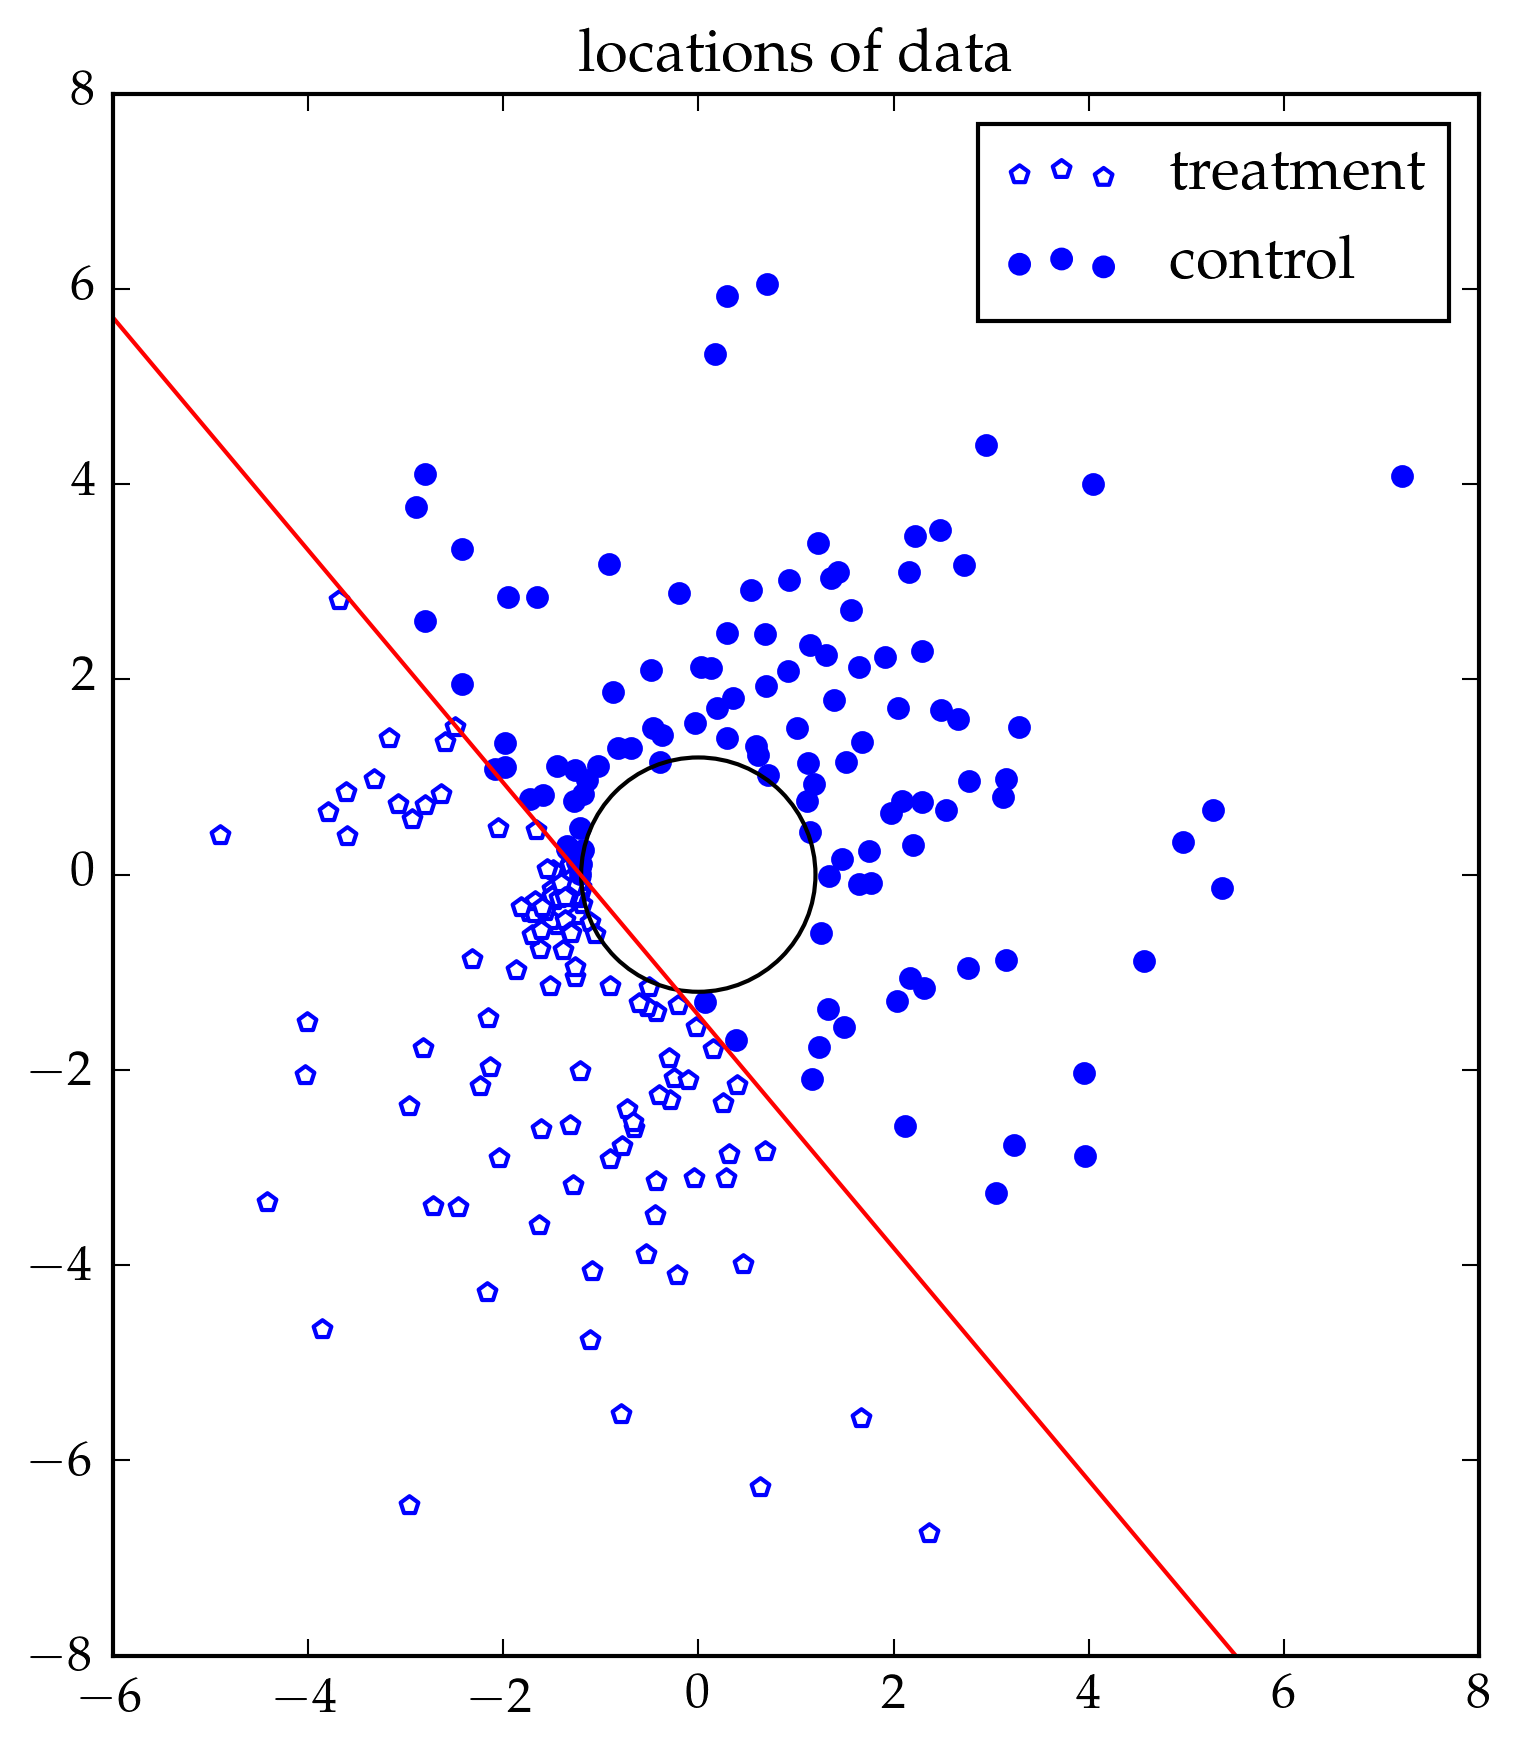

In [55]:
function plot_line(angle::Float64, shift::Float64, X::Matrix; kwargs...)
    meanx=mean(X[1,:])
    meany=mean(X[2,:])
    dydx=tand(angle)
    direction=sign(cosd(angle+90))
    if direction==0.0
        direction=1.0
    end
    shift_x = shift*cosd(angle+90)*direction
    shift_y = shift*sind(angle+90)*direction
    
    xlim=plt.xlim()
    ylim=plt.ylim()
    xlim_arr = Float64[xlim[1],xlim[2]]
    ylim_arr = Float64[ylim[1],ylim[2]]
    if dydx > 1e3
        plt.axvline(meanx+shift_x, color="red"; kwargs...)
    elseif dydx > 10
        plt.plot(meanx+(ylim_arr.-meany.-shift_y)./dydx+shift_x,ylim_arr; color="red", kwargs...)
    else
        plt.plot(xlim_arr,meany+(xlim_arr.-shift_x.-meanx).*dydx+shift_y; color="red", kwargs...)
    end
    plt.xlim(xlim)
    plt.ylim(ylim)
end

circle=plt.plt[:Circle]((0,0),r◫,color="black", fill=false)
plt.gca()[:add_artist](circle)
plt.gca()[:set_aspect]("equal")
plt.title("locations of data")
plt.legend(loc="best")

angle = 130.0
shift = GeoRDD.shift_for_even_split(angle, X[:,!inside])
are_left = GeoRDD.left_points(angle, shift, X[:,!inside])

plt.scatter(X[1,!inside][are_left],X[2,!inside][are_left], color="white", edgecolor="blue", marker="p", label="treatment")
plt.scatter(X[1,!inside][!are_left],X[2,!inside][!are_left], color="blue", label="control")

plot_line(angle,shift, X[:,!inside])

plt.legend(loc="best")
;

I implemented a function, `placebo`, that:
* takes an angle, and the original control data
* draws a linear boundary through the control data at that angle that splits the data in half
* then applies our likelihood test to the data under this new boundary,
* spits out the p-value. 

Here's an example at 0°, with 1000 draws from the null performed for the test.

In [57]:
@printf("p-value for placebo test at 0°: %.3f", 
    GeoRDD.placebo(0.0, X[:,!inside], Y[!inside], kern, log(√σy2_star), 1000))

p-value for placebo test at 0°: 0.264

In [47]:
@time pvals = [GeoRDD.placebo(float(angle), X[:,!inside], Y[!inside], kern, log(√σy2_star), 1000) for angle in 1:180];

 45.956132 seconds (14.31 M allocations: 5.389 GB, 0.81% gc time)


A quick look at the resulting p-values shows some issues.
The p-values are strongly correlated across angles, 
so we definitely don't have 180 independent replications of the test. 
There's some sharp jumps that are particularly interesting.
By eye it looks like we have maybe a dozen effective samples.
The histogram of p-values is not quite uniform, but this could
easily be attributed to the low number of effective samples.

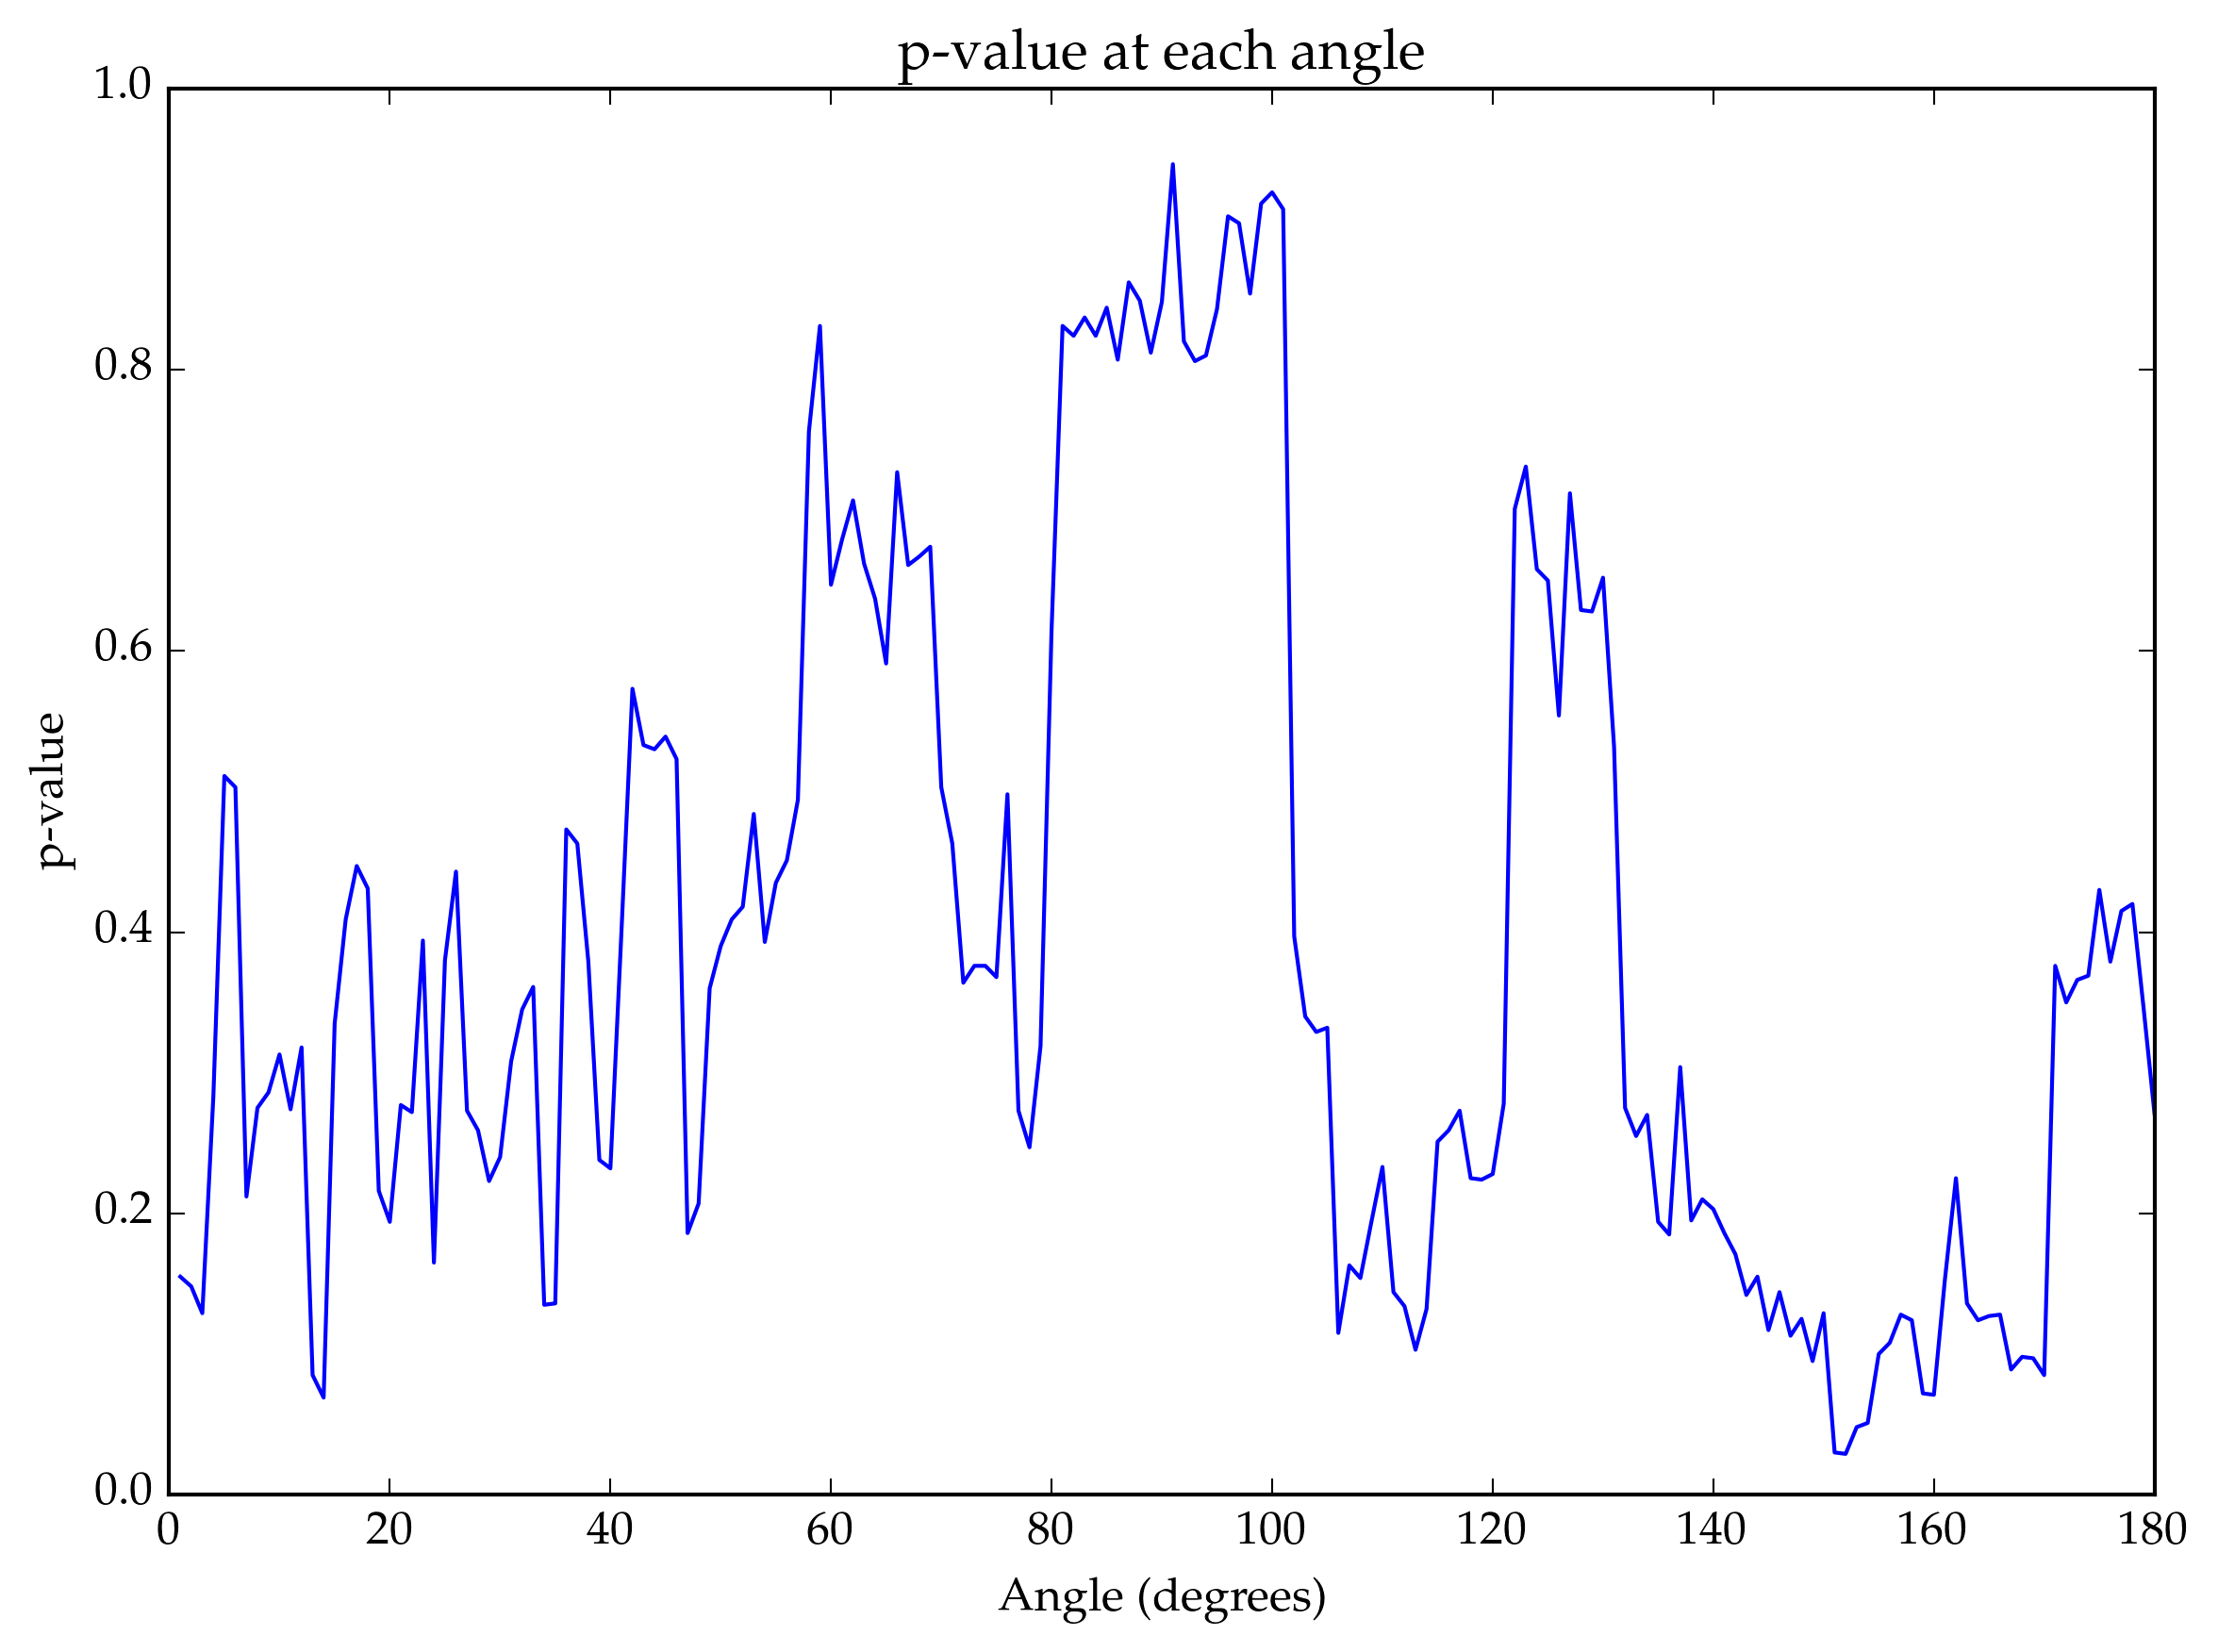

In [48]:
plt.plot(1:180,pvals)
plt.xlabel("Angle (degrees)")
plt.ylabel("p-value")
plt.title("p-value at each angle")
;

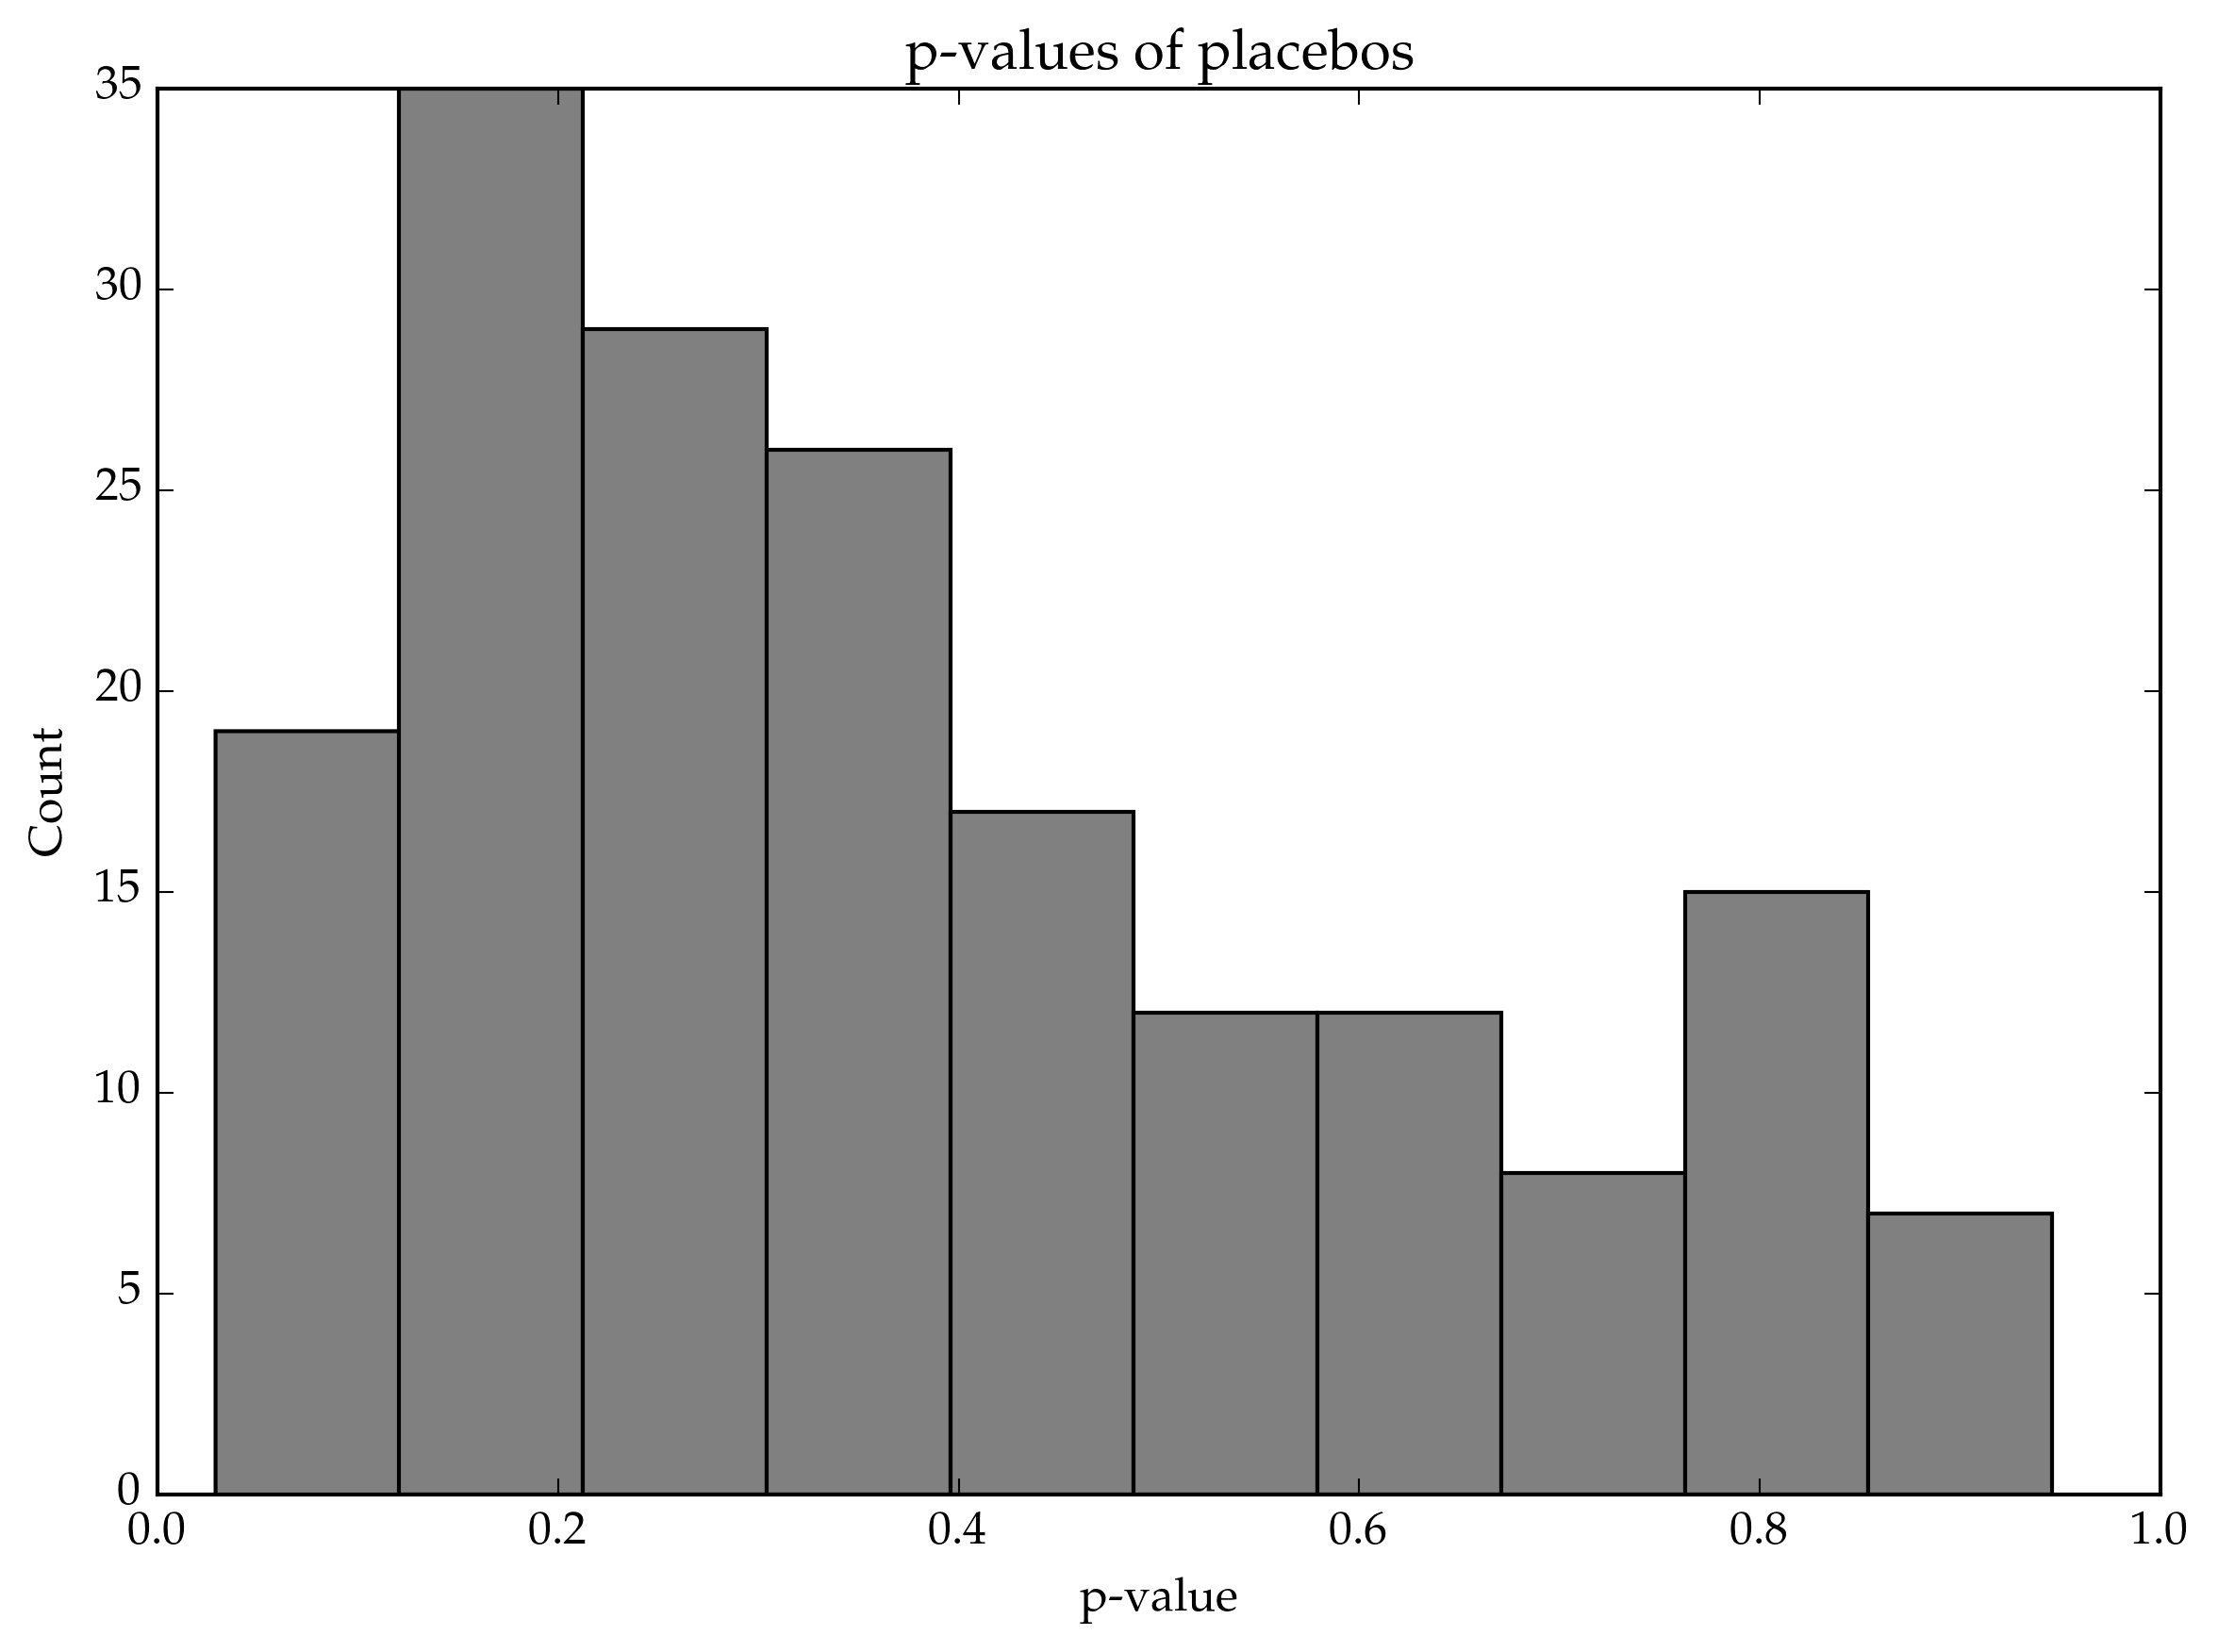

In [50]:
plt.plt[:hist](pvals, color="grey")
plt.xlabel("p-value")
plt.ylabel("Count")
plt.title("p-values of placebos")
;

## Checking the validity of the placebo test

Let's just observe the behavior of the placebo test over lots of replications from the null.
We do quite commonly observe sharp jumps in the p-values as a function of angle,
which we also observe in the NYC data.
The histograms of p-values are overall fairly flat, 
though there was one with a lot of low p-values,
and we do see occasional concentration of p-values
at the low or high end of the scale,
confirming the intuition that the effective sample size
of this placebo test is fairly low.

 72.137755 seconds (14.31 M allocations: 5.389 GB, 1.03% gc time)
 73.943758 seconds (14.30 M allocations: 5.388 GB, 0.60% gc time)
 79.198002 seconds (14.30 M allocations: 5.388 GB, 0.56% gc time)
 53.139016 seconds (14.30 M allocations: 5.388 GB, 0.71% gc time)
 46.529667 seconds (14.30 M allocations: 5.388 GB, 0.77% gc time)
 46.751953 seconds (14.30 M allocations: 5.388 GB, 0.77% gc time)
 47.033453 seconds (14.30 M allocations: 5.388 GB, 0.76% gc time)
 49.647969 seconds (14.30 M allocations: 5.388 GB, 0.75% gc time)
 50.040242 seconds (14.30 M allocations: 5.388 GB, 0.74% gc time)


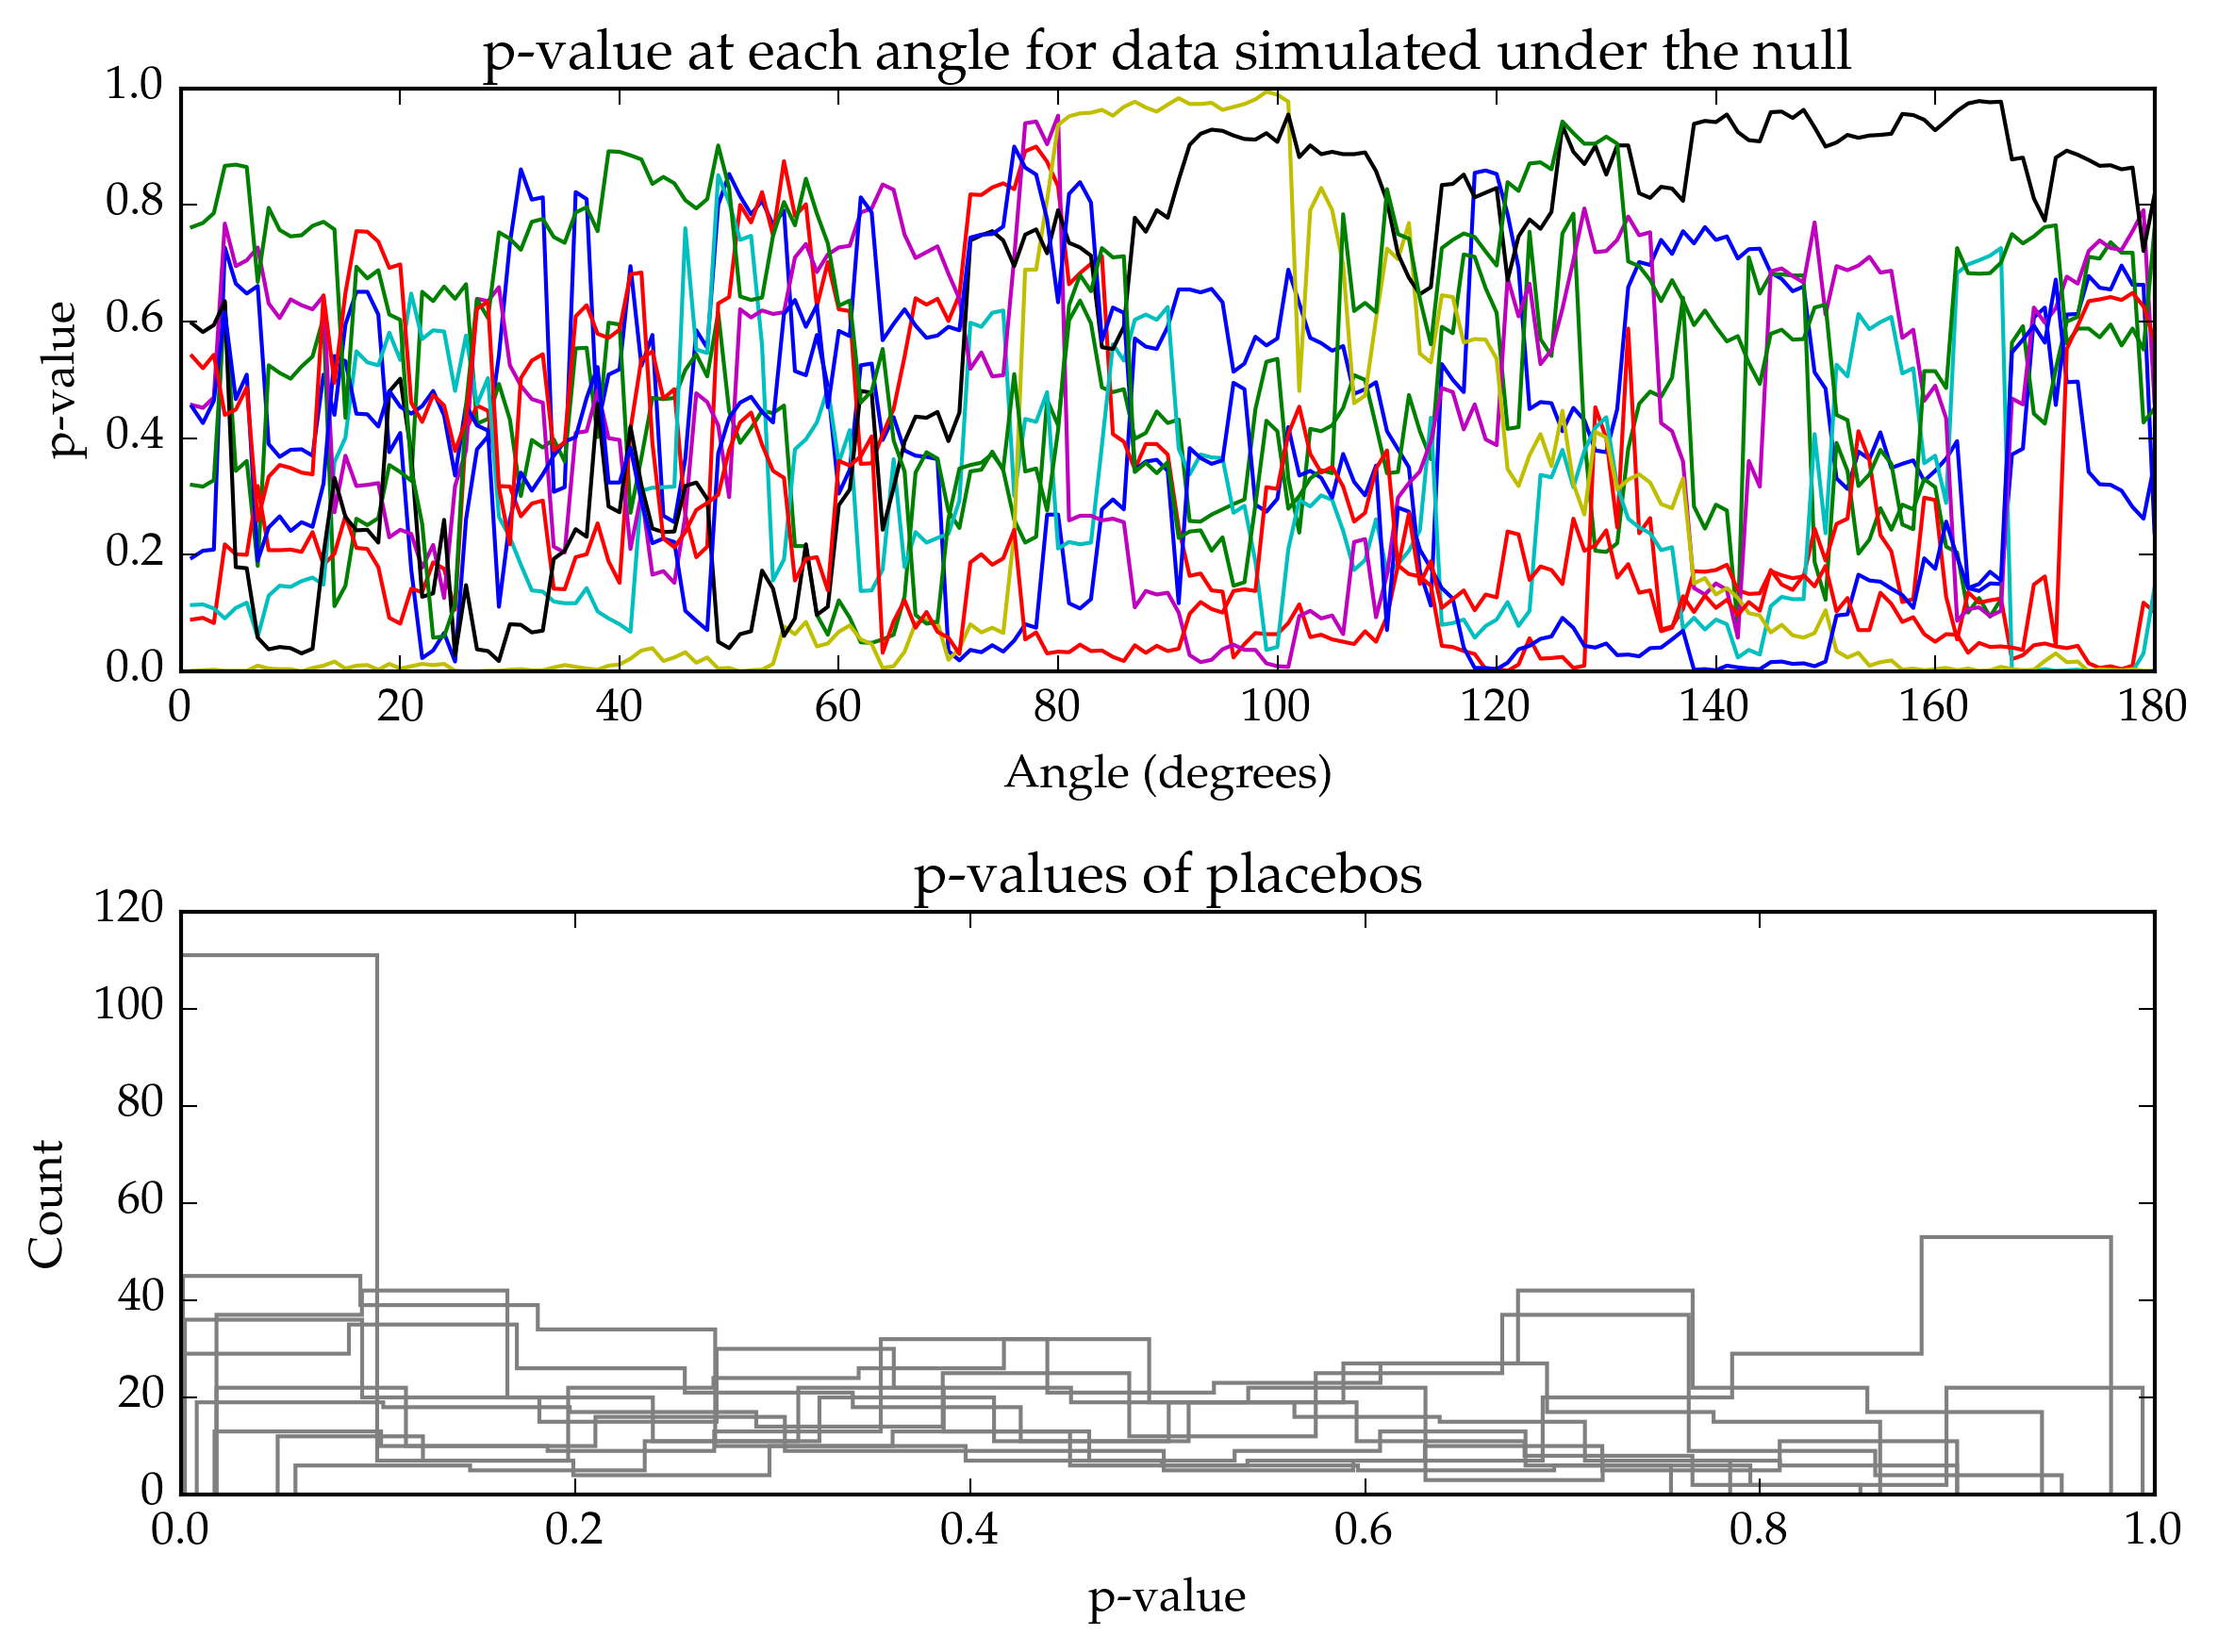

 49.047000 seconds (14.30 M allocations: 5.388 GB, 0.74% gc time)


In [65]:
null = MultivariateNormal(zeros(n), gp_null.cK)
for _ in 1:10
    Ysim_null = rand(null)
    @time pvals = [GeoRDD.placebo(float(angle), 
        X[:,!inside], 
        Ysim_null[!inside], 
        kern, 
        log(√σy2_star), 1000) 
        for angle in 1:180];
    plt.subplot(2,1,1)
    plt.plot(1:180,pvals)
    plt.xlabel("Angle (degrees)")
    plt.ylabel("p-value")
    plt.title("p-value at each angle for data simulated under the null")
    
    plt.subplot(2,1,2)
    plt.plt[:hist](pvals, color="grey", histtype="step")
    plt.xlabel("p-value")
    plt.ylabel("Count")
    plt.title("p-values of placebos")
end